# Expedia Hotel Recommendations

Written by: Lais Amorim Menezes

Contact Email: laisamorimmenezes@gmail.com

Date Filled: Oct 16, 2023

### Table of Contents:

1. Introduction:
2. Key Questions:
3. Assumptions & Limitations
4. Methods
5. Finding & Analysis
6. Data Dictionary
7. Data Cleaning 
8. EDA 

* [Analysis for column `Date_time`](#1)
* [Analysis for column `Site_name`](#2)
* [Analysis for column `Posa_continents`](#3)
* [Analysis for column `User_location_country`](#4)
* [Analysis for column `User_location_region` and `User_location_city`](#5)
* [Analysis for column `Orig_destination_distance`](#6)
* [Analysis for column `User_id`](#7)
* [Analysis for column `Is_mobile`](#8)
* [Analysis for column `Is_package`](#9)
* [Analysis for column `Channel`](#10)
* [Analysis for column `Srch_ci`, `Srch_co` and `number_of_days`](#11)
* [Analysis for column `Srch_adults_cnt`, `Srch_children_cnt` and `Srch_rm_cnt`](#12)
* [Analysis for column `Srch_destination_id` and `Srch_destination_type_id`](#13)
* [Analysis for column `Is_booking`](#14)
* [Analysis for column `Cnt`](#15)
* [Analysis for column `Hotel_continent`, `Hotel_country` and `Hotel_market`](#16)
* [Analysis for column `Hotel_cluster`](#17)
* [Some graphics](#18)
* [Cleaning the test data](#19)


## Introduction:

This business report aims to analyze the customer interactions on Expedia's website. The dataset comprises a selection of records from Expedia's vast collection. Due to the dataset's substantial size, a sample has been taken to facilitate computational efficiency.

The primary objective of this analysis is to predict the hotel cluster that a user is likely to book. Expedia provides a hotel cluster, an in-house algorithm grouping similar hotels based on various factors such as historical pricing, customer ratings, and proximity to city centers. These clusters are invaluable for predicting user preferences when booking hotels. It is important to note that the dataset contains 100 distinct hotel clusters. This predictive goal requires the anticipation of a user's booking outcome (hotel cluster) based on their search and related event attributes. The training data covers the period from 2013 to July 2014, with the test data spanning from August to December 2014

## Key Question:

1. How can we effectively sample and clean the data to prepare it for analysis?
2. What insights can we gather from each column to gain a comprehensive understanding of their significance?
3. How can we draw meaningful conclusions and identify the target variable, along with selecting suitable models for predictive analysis?

## Assumptions & Limitations:

Assumptions:

1. Data Accuracy: It is assumed that the provided data accurately represents a subset of Expedia's extensive dataset.
2. Relevance of Clusters: The assumption is made that hotel clusters are significant identifiers of user booking preferences.

Limitations:

1. Data Encoding: The dataset lacks categorical columns, as all variables are stored numerically. This necessitates the non-standard treatment of numerical columns.
2. Temporal Constraints: The data covers a limited timeframe and does not capture long-term trends or seasonal variations.

## Methods:

The analysis begins with the acquisition of a representative sample from Expedia's customer interaction dataset, accessible on the Kaggle website. The report proceeds by splitting the data into training and test sets based on the interaction's datetime, enabling us to assess prediction accuracy in the future. Data cleaning is undertaken to ensure data quality, followed by a comprehensive exploratory data analysis aimed at unveiling the underlying characteristics and interpretations of each column.

## Finding & Analysis:

In the year 2013, the months with the highest website interactions were March, July, and October. This pattern continues into 2014, with July being the peak month. Unfortunately, our data only goes up to July 2014. The year 2014 shows an increase in interactions compared to 2013, indicating growing website engagement.

We observed that each site name (e.g., Expedia.com, Expedia.co.uk) corresponds to only one continent. However, multiple site names may link to the same continent. It suggests that certain user locations are more engaged in searches, possibly where Expedia is more popular.

The median distance between the origin and destination points is approximately 1168.39 miles, which is approximately a 2-hour flight. This gives us an idea of the average travel distances customers are interested in.

Most users access the website from non-mobile devices. Additionally, they often search for hotel options without combining them with flight packages, implying that a significant portion of the users might be primarily interested in hotels.

The majority of customers searching the website are likely looking for a one-day hotel stay, typically for two people, likely a couple, booking only one room and traveling without children. They also show a preference for starting their hotel stays on Sundays and tend to conduct searches primarily on weekdays.

In terms of destination types, there are 11 options available. More than half of the destinations are classified as type 1. This suggests a high demand for a particular type of destination.

Only 8.71% of the interactions result in actual bookings.

Destinations in different continents vary in terms of the number of associated countries. Some continents have multiple countries to explore, while others only have a few like 2.

The target variable for our predictive modeling is the hotel cluster.

These findings provide valuable insights into user behavior and preferences on the Expedia website, which will be crucial for any predictive modeling or recommendations for users.

## Data Dictionary

| Column name |Description	Data| Type |
|----------|----------|----------|
|  date_time |	Timestamp when the customer made the interaction in the website	| string|
| posa_continent	| ID of continent associated with site_name	| int |
| user_location_country	| The ID of the country the customer is located	| int |
| user_location_region	| The ID of the region the customer is located	|int|
| user_location_city |	The ID of the city the customer is located	|int|
|orig_destination_distance | Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated	|double|
|user_id	| ID of user|	int|
| is_mobile	| 1 when a user connected from a mobile device, 0 otherwise	tiny|int|
|is_package|	1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise|	int|
|channel|	ID of a marketing channel	|int|
|srch_ci	|Checkin date	|string|
|srch_co|	Checkout date	|string|
|srch_adults_cnt|	The number of adults specified in the hotel room|	int|
|srch_children_cnt|	The number of (extra occupancy) children specified in the hotel room	|int|
|srch_rm_cnt	|The number of hotel rooms specified in the search	|int|
|srch_destination_id|	ID of the destination where the hotel search was performed	|int|
|srch_destination_type_id	|Type of destination|	int|
|is_booking	|1 if a booking, 0 if a click	|tinyint|
|cnt|	Numer of similar even
ts in the context of the same user session	|bigint|
|hotel_continent	|Hotel continent	|int|
|hotel_country|	Hotel country|	int|
|hotel_market|	Hotel market	|int|
|hotel_cluster|	ID of a hotel cluster	|int|

## Data Cleaning 

In [188]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
import plotly.express as px
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [189]:
#Loding the data
hotel_data = pd.read_csv('/Users/laisamorim/Desktop/Brain Station Course/Capstone/Notebooks/Data/train.csv')

As the data is very big I got a sample of 4670293 and put the random_state so I can replicate if I need.

In [190]:
# Getting a sample of the data
hotel_df = hotel_data.sample(n = 4670293, random_state = 42)

In [191]:
# Save the sampled data to a CSV file
hotel_df.to_csv('hotel_df.csv', index=False)

In [522]:
#Loding the data
hotel_df = pd.read_csv('/Users/laisamorim/Desktop/Brain Station Course/Capstone/Notebooks/Data/hotel_df.csv')

In [523]:
# Checking the 5 first rows
hotel_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-11-02 12:39:22,2,3,66,220,54870,636.48,1079676,1,0,9,2015-10-11,2015-10-15,6,0,1,5405,6,0,1,4,8,126,66
1,2014-08-20 19:13:46,2,3,117,373,16218,NaN,145975,0,0,9,2014-09-27,2014-09-30,3,3,2,11917,1,0,1,0,140,59,92
2,2014-10-13 12:40:44,23,1,1,457,6693,656.03,1067677,0,0,5,2014-12-31,2015-01-04,2,0,1,8253,1,0,1,6,70,19,51
3,2014-04-10 18:17:35,2,3,66,258,4687,5581.49,179461,1,0,9,2014-08-11,2014-08-13,2,0,1,792,1,0,1,6,208,1480,67
4,2014-10-23 12:56:53,2,3,66,348,43040,NaN,971368,0,0,1,2014-10-27,2014-10-29,2,0,1,12014,1,0,2,2,50,644,68


In [524]:
# Checking the 5 last rows
hotel_df.tail()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
4670288,2014-06-27 14:40:48,2,3,66,447,42413,38.82,1049415,1,0,9,2014-06-28,2014-06-30,2,0,1,11625,1,0,1,2,50,658,71
4670289,2014-07-11 16:45:24,2,3,179,11,51280,NaN,1191613,0,1,3,2015-01-23,2015-01-29,2,0,1,547,1,0,2,4,25,176,62
4670290,2014-07-18 23:13:33,2,3,66,324,7041,7885.59,339864,0,0,9,2014-10-07,2014-10-18,1,0,1,468,1,0,1,3,48,153,66
4670291,2014-12-29 23:40:07,2,3,66,153,5526,270.64,238273,1,0,9,2014-12-30,2014-12-31,1,0,1,1493,1,0,2,2,50,587,28
4670292,2013-08-23 10:06:56,2,3,103,45,38784,NaN,276140,0,1,9,2013-10-18,2013-10-22,2,0,1,8267,1,0,6,2,50,675,69


By examining the first and last 5 rows of the dataset, we gain initial insights into the data. To deepen our understanding further, let's explore the types and characteristics of all the columns.

In [525]:
# Cheking all the columns
hotel_df.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [526]:
# Checking the column type
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670293 entries, 0 to 4670292
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_time                  object 
 1   site_name                  int64  
 2   posa_continent             int64  
 3   user_location_country      int64  
 4   user_location_region       int64  
 5   user_location_city         int64  
 6   orig_destination_distance  float64
 7   user_id                    int64  
 8   is_mobile                  int64  
 9   is_package                 int64  
 10  channel                    int64  
 11  srch_ci                    object 
 12  srch_co                    object 
 13  srch_adults_cnt            int64  
 14  srch_children_cnt          int64  
 15  srch_rm_cnt                int64  
 16  srch_destination_id        int64  
 17  srch_destination_type_id   int64  
 18  is_booking                 int64  
 19  cnt                        int64  
 20  ho

Upon inspection, it's evident that the dataset exclusively contains numerical data (integer and float), with the exception of columns that are of object type. Since the object data pertains to date and time information, we can proceed to convert it into datetime format.

In [527]:
# Change the column `date_time` to a datetime type.
hotel_df['date_time'] = pd.to_datetime(hotel_df['date_time'])

In [528]:
# Checking the column type (sanity check)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670293 entries, 0 to 4670292
Data columns (total 24 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    object        
 12  srch_co                    object        
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64    

I will split the data into train and in test the train data will be for year 2013 and July of 2014 and the test data will be from August to end of the year of 2014.

In [529]:
# Splitting the data in train and test
test_df = hotel_df[(hotel_df['date_time'].dt.year == 2014) & (hotel_df['date_time'].dt.month >= 8)]
hotel_df = hotel_df[(hotel_df['date_time'].dt.year == 2013) | ((hotel_df['date_time'].dt.year == 2014) & (hotel_df['date_time'].dt.month < 8))]

In [530]:
# Cheking the first 5 rows of the train data
hotel_df.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
3,2014-04-10 18:17:35,2,3,66,258,4687,5581.49,179461,1,0,9,2014-08-11,2014-08-13,2,0,1,792,1,0,1,6,208,1480,67
5,2013-03-25 18:30:34,2,3,66,363,31283,NaN,172916,0,0,9,2013-08-17,2013-08-18,2,1,1,8253,1,0,2,6,70,19,11
8,2014-07-15 13:46:54,2,3,66,184,2037,611.80,488305,0,1,0,2014-12-25,2014-12-28,2,4,1,8250,1,0,1,2,50,628,45
10,2014-05-28 09:23:19,2,3,152,545,51071,NaN,969295,0,0,9,2014-07-19,2014-07-22,6,0,2,20968,6,1,1,6,144,1324,59
11,2013-03-23 20:00:06,11,3,66,442,55448,189.41,1124094,1,0,9,2013-03-24,2013-03-25,2,1,1,26862,6,0,4,2,50,745,5


In [531]:
# Cheking the first 10 rows of the test data
test_df.head(10)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-11-02 12:39:22,2,3,66,220,54870,636.48,1079676,1,0,9,2015-10-11,2015-10-15,6,0,1,5405,6,0,1,4,8,126,66
1,2014-08-20 19:13:46,2,3,117,373,16218,NaN,145975,0,0,9,2014-09-27,2014-09-30,3,3,2,11917,1,0,1,0,140,59,92
2,2014-10-13 12:40:44,23,1,1,457,6693,656.03,1067677,0,0,5,2014-12-31,2015-01-04,2,0,1,8253,1,0,1,6,70,19,51
4,2014-10-23 12:56:53,2,3,66,348,43040,NaN,971368,0,0,1,2014-10-27,2014-10-29,2,0,1,12014,1,0,2,2,50,644,68
6,2014-10-24 11:14:42,11,3,205,330,13971,257.71,95263,0,0,9,2014-10-27,2014-10-29,4,0,2,26272,6,1,1,2,198,975,7
7,2014-11-11 17:55:27,37,1,69,761,41949,NaN,168578,0,0,9,2014-11-18,2014-11-21,1,0,1,45327,6,0,1,2,50,675,56
9,2014-09-10 18:22:21,2,3,66,174,5938,76.33,287385,0,0,1,2014-10-04,2014-10-05,2,0,1,4273,3,0,1,2,50,366,18
12,2014-11-03 15:20:45,2,3,66,322,44140,1728.45,906548,1,1,0,2015-03-22,2015-03-27,2,2,1,8279,1,0,2,2,50,1230,70
16,2014-12-05 23:38:53,2,3,66,462,49272,614.02,1172654,0,0,2,2014-12-12,2014-12-14,2,0,1,24193,6,0,1,2,50,360,91
18,2014-12-14 08:12:06,2,3,66,174,19302,412.60,614460,0,0,9,2015-01-01,2015-01-04,2,0,1,8250,1,0,1,2,50,628,88


In [532]:
# Shape of the train data
print(f'There are {hotel_df.shape[0]} columns and {hotel_df.shape[1]} rows')

There are 2963463 columns and 24 rows


In [533]:
# Checking the column type
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2963463 entries, 3 to 4670292
Data columns (total 24 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    object        
 12  srch_co                    object        
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64         

In [534]:
# Checking the duplicated
hotel_df.duplicated().sum()

11

As shown, there are 11 duplicated rows. Let's examine them to determine if they can be safely dropped.

In [535]:
# Cheking the duplicated rows:
duplicate_rows = hotel_df[hotel_df.duplicated(keep=False)]

# Sort in descending order
duplicate_rows = duplicate_rows.sort_values(by='date_time', ascending=False)

duplicate_rows

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
1423320,2014-07-26 14:10:58,22,2,0,203,54226,NaN,1651,0,0,5,2014-08-19,2014-08-21,5,0,3,48908,4,0,1,3,182,46,36
4217883,2014-07-26 14:10:58,22,2,0,203,54226,NaN,1651,0,0,5,2014-08-19,2014-08-21,5,0,3,48908,4,0,1,3,182,46,36
3436856,2014-07-13 02:41:56,24,2,3,45,21685,NaN,9763,0,0,9,2014-07-19,2014-07-20,1,0,1,8797,1,0,1,6,144,1450,82
1908332,2014-07-13 02:41:56,24,2,3,45,21685,NaN,9763,0,0,9,2014-07-19,2014-07-20,1,0,1,8797,1,0,1,6,144,1450,82
4605004,2014-06-27 12:55:44,2,3,154,892,41193,NaN,133858,0,0,2,2014-08-07,2014-08-10,2,0,1,375,1,0,1,4,119,2063,82
1907438,2014-06-27 12:55:44,2,3,154,892,41193,NaN,133858,0,0,2,2014-08-07,2014-08-10,2,0,1,375,1,0,1,4,119,2063,82
1915749,2014-06-27 09:00:45,2,3,66,337,51661,NaN,808005,0,0,3,2014-08-02,2014-08-03,2,0,1,7635,3,0,1,2,50,675,69
1204825,2014-06-27 09:00:45,2,3,66,337,51661,NaN,808005,0,0,3,2014-08-02,2014-08-03,2,0,1,7635,3,0,1,2,50,675,69
379461,2014-05-05 18:41:53,24,2,0,435,2976,NaN,1187184,0,0,9,2014-10-18,2014-10-23,2,2,1,21222,1,0,2,3,152,73,27
3040579,2014-05-05 18:41:53,24,2,0,435,2976,NaN,1187184,0,0,9,2014-10-18,2014-10-23,2,2,1,21222,1,0,2,3,152,73,27


In [536]:
# Cheking the percentage of duplicated rows
duplicate_percentage = (hotel_df.duplicated().sum() / len(hotel_df)) * 100
duplicate_percentage

0.000371187357493581

In [537]:
# Dropping the duplicated rows
hotel_df = hotel_df.drop_duplicates()

In [538]:
# Sanity check
hotel_df.duplicated().sum()

0

Upon closer inspection of the data, I identified 11 duplicate columns. After further examination and considering the percentage of duplication, I have decided to remove these columns from the dataset.

In [539]:
# Cheking the NaN values
hotel_df.isna().sum()

date_time                          0
site_name                          0
posa_continent                     0
user_location_country              0
user_location_region               0
user_location_city                 0
orig_destination_distance    1039647
user_id                            0
is_mobile                          0
is_package                         0
channel                            0
srch_ci                         5256
srch_co                         5256
srch_adults_cnt                    0
srch_children_cnt                  0
srch_rm_cnt                        0
srch_destination_id                0
srch_destination_type_id           0
is_booking                         0
cnt                                0
hotel_continent                    0
hotel_country                      0
hotel_market                       0
hotel_cluster                      0
dtype: int64

As shown above, we have 1,039,647 rows with NaN values. Let's examine these rows and their percentage to determine whether we should drop them or not.

In [540]:
# Checking the rows where `orig_destination_distance` are NaN values
hotel_df[hotel_df['orig_destination_distance'].isna()]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
5,2013-03-25 18:30:34,2,3,66,363,31283,NaN,172916,0,0,9,2013-08-17,2013-08-18,2,1,1,8253,1,0,2,6,70,19,11
10,2014-05-28 09:23:19,2,3,152,545,51071,NaN,969295,0,0,9,2014-07-19,2014-07-22,6,0,2,20968,6,1,1,6,144,1324,59
15,2014-06-17 21:59:44,24,2,3,50,50576,NaN,215012,0,0,9,2014-06-27,2014-06-29,2,0,1,669,3,0,2,2,50,212,84
20,2014-04-20 03:21:33,37,1,69,750,1393,NaN,18030,1,1,9,2014-08-20,2014-09-01,0,0,1,8739,1,0,1,6,144,4,29
28,2014-05-01 19:50:03,2,3,66,337,18732,NaN,294121,0,1,9,2014-07-30,2014-08-05,1,0,1,8791,1,0,2,4,8,110,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670268,2013-01-22 18:38:06,30,4,195,597,51774,NaN,1038876,0,0,3,2013-03-13,2013-03-15,2,0,1,7635,3,0,1,2,50,675,55
4670275,2013-04-17 23:22:12,15,1,55,13,3025,NaN,1152372,0,0,5,2013-05-16,2013-05-19,2,0,1,24174,6,1,1,6,170,1894,62
4670281,2013-05-21 11:32:59,37,1,69,930,13984,NaN,79659,0,0,5,2013-05-21,2013-05-22,1,1,1,20994,1,0,2,6,46,1089,11
4670289,2014-07-11 16:45:24,2,3,179,11,51280,NaN,1191613,0,1,3,2015-01-23,2015-01-29,2,0,1,547,1,0,2,4,25,176,62


In [541]:
# Check the percentage
percentage_nan = (hotel_df['orig_destination_distance'].isna().sum() / len(hotel_df)) * 100
percentage_nan

35.08229591705889

In [542]:
# Dropping the NaN values
hotel_df.dropna(subset=['orig_destination_distance'], inplace=True)

In [543]:
# Sanity check 
hotel_df['orig_destination_distance'].isna().sum()

0

I decided to remove the `orig_destination_distance` column due to the presence of a significant number of NaN values, exceeding 20%.

In [544]:
hotel_df['srch_ci'].isna().sum()

3074

In [545]:
hotel_df['srch_co'].isna().sum()

3074

In [546]:
hotel_df[(hotel_df['srch_ci'].isna()) & (hotel_df['srch_co'].isna()) & (hotel_df['is_booking'] == 0)] 

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
578,2013-05-13 17:12:46,2,3,66,174,5746,1837.54,835338,1,0,0,NaN,NaN,2,0,1,11972,1,0,1,4,8,1456,60
1639,2013-02-21 21:44:31,2,3,66,340,43356,5401.90,518573,0,0,9,NaN,NaN,2,0,1,33649,1,0,2,5,194,1593,46
1762,2013-04-17 20:07:31,34,3,205,155,53927,6093.15,79497,0,0,9,NaN,NaN,2,0,1,21554,6,0,1,6,208,951,9
2912,2013-06-02 14:23:37,2,3,66,346,29217,292.84,232885,0,0,9,NaN,NaN,2,0,1,3071,3,0,1,2,50,969,91
3572,2013-11-04 20:50:45,11,3,205,135,1392,1751.74,347205,0,0,0,NaN,NaN,2,0,1,27476,6,0,1,2,50,647,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666673,2014-03-10 19:46:02,2,3,66,442,53708,840.30,43150,0,0,9,NaN,NaN,1,0,1,8268,1,0,1,2,50,682,23
4666909,2014-06-07 09:54:54,2,3,66,174,26232,2394.94,1119058,0,0,2,NaN,NaN,2,0,1,19777,6,0,1,2,50,212,84
4668020,2013-01-28 23:45:20,34,3,205,411,50761,1611.18,1075726,1,0,9,NaN,NaN,2,0,1,12233,6,0,4,2,50,675,98
4668664,2013-06-20 12:23:19,2,3,66,260,19022,4975.50,433668,0,1,9,NaN,NaN,2,0,1,17805,6,0,2,6,105,1409,62


As observed, there are 3,074 rows with NaN values in both the srch_ci and srch_co columns. This is expected since the absence of a check-in date often implies the absence of a check-out date as well. These rows correspond to instances where users were simply browsing for hotels, as indicated by the `is_booking` column being equal to 0. In such cases, users did not specify exact check-in and check-out dates.

In [547]:
# Cheking the percentage of NaN values in the `srch_ci` column
percentage_nan = (hotel_df['srch_ci'].isna().sum() / len(hotel_df)) * 100
percentage_nan

0.1597875044508149

In [548]:
# Dropping the NaN values
hotel_df.dropna(subset=['srch_ci'], inplace=True)

In [549]:
# Sanity check
hotel_df['srch_ci'].isna().sum()

0

In [550]:
# Check the `srch_co` column
hotel_df['srch_co'].isna().sum()

0

I decided to drop the NaN values in the `srch_ci` column, as they accounted for just 0.159% of the data. Upon further investigation, I found that the same rows with NaN values in `srch_ci` also had NaN values in `srch_co`. Consequently, I have successfully eliminated NaN values in both columns.

In [551]:
# Sanity check
hotel_df.isna().sum()

date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
dtype: int64

In [552]:
# Have a new name for the clean data
hotel_clean = hotel_df

In [553]:
# Checking the data
hotel_clean.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
3,2014-04-10 18:17:35,2,3,66,258,4687,5581.49,179461,1,0,9,2014-08-11,2014-08-13,2,0,1,792,1,0,1,6,208,1480,67
8,2014-07-15 13:46:54,2,3,66,184,2037,611.80,488305,0,1,0,2014-12-25,2014-12-28,2,4,1,8250,1,0,1,2,50,628,45
11,2013-03-23 20:00:06,11,3,66,442,55448,189.41,1124094,1,0,9,2013-03-24,2013-03-25,2,1,1,26862,6,0,4,2,50,745,5
13,2013-08-10 18:33:14,2,3,66,467,10851,1331.84,109659,1,0,9,2013-10-09,2013-10-11,2,0,1,12206,6,0,1,2,50,628,79
14,2014-01-16 08:31:44,2,3,66,174,55922,95.00,647367,0,0,2,2014-01-17,2014-01-18,2,0,1,24282,6,0,3,2,50,355,48


## EDA

In this exploratory data analysis (EDA), I will systematically analyze each column to gain deeper insights from the dataset.

#### Making an analysis in column `Date_time` <a class= 'anchor' id = '1'></a> 

In [554]:
# Cheking the type
hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920731 entries, 3 to 4670290
Data columns (total 24 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    object        
 12  srch_co                    object        
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64         

I already verified that the `Date_time` column was initially in object format, and to facilitate data manipulation within this column, I converted it to a datetime format.

In [555]:
# Checking the data
hotel_clean

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
3,2014-04-10 18:17:35,2,3,66,258,4687,5581.49,179461,1,0,9,2014-08-11,2014-08-13,2,0,1,792,1,0,1,6,208,1480,67
8,2014-07-15 13:46:54,2,3,66,184,2037,611.80,488305,0,1,0,2014-12-25,2014-12-28,2,4,1,8250,1,0,1,2,50,628,45
11,2013-03-23 20:00:06,11,3,66,442,55448,189.41,1124094,1,0,9,2013-03-24,2013-03-25,2,1,1,26862,6,0,4,2,50,745,5
13,2013-08-10 18:33:14,2,3,66,467,10851,1331.84,109659,1,0,9,2013-10-09,2013-10-11,2,0,1,12206,6,0,1,2,50,628,79
14,2014-01-16 08:31:44,2,3,66,174,55922,95.00,647367,0,0,2,2014-01-17,2014-01-18,2,0,1,24282,6,0,3,2,50,355,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670284,2013-09-25 10:06:36,11,3,205,385,46963,332.15,1053761,0,1,9,2013-10-16,2013-10-17,1,0,1,8267,1,0,2,2,50,675,83
4670285,2014-05-20 22:16:22,2,3,66,174,23702,327.09,165598,0,0,0,2014-05-25,2014-05-26,2,0,1,9145,1,0,2,2,50,364,50
4670287,2013-10-20 22:43:37,2,3,205,155,13951,258.95,612454,0,0,9,2013-12-23,2013-12-27,2,2,1,5794,3,0,2,2,50,660,94
4670288,2014-06-27 14:40:48,2,3,66,447,42413,38.82,1049415,1,0,9,2014-06-28,2014-06-30,2,0,1,11625,1,0,1,2,50,658,71


In [556]:
# Cheking the years
hotel_clean['date_time'].dt.year.unique()

array([2014, 2013], dtype=int32)

In [557]:
# Cheking the months
hotel_clean['date_time'].dt.month.unique()

array([ 4,  7,  3,  8,  1,  5,  6,  2, 10,  9, 11, 12], dtype=int32)

In [558]:
# Checking if we have data from the year 2014 after August
hotel_clean[(hotel_clean['date_time'].dt.year == 2014) & (hotel_clean['date_time'].dt.month >= 8)]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster


As we've observed, there's no data available beyond August 2014. This gap is due to the data being reserved for the test dataset.

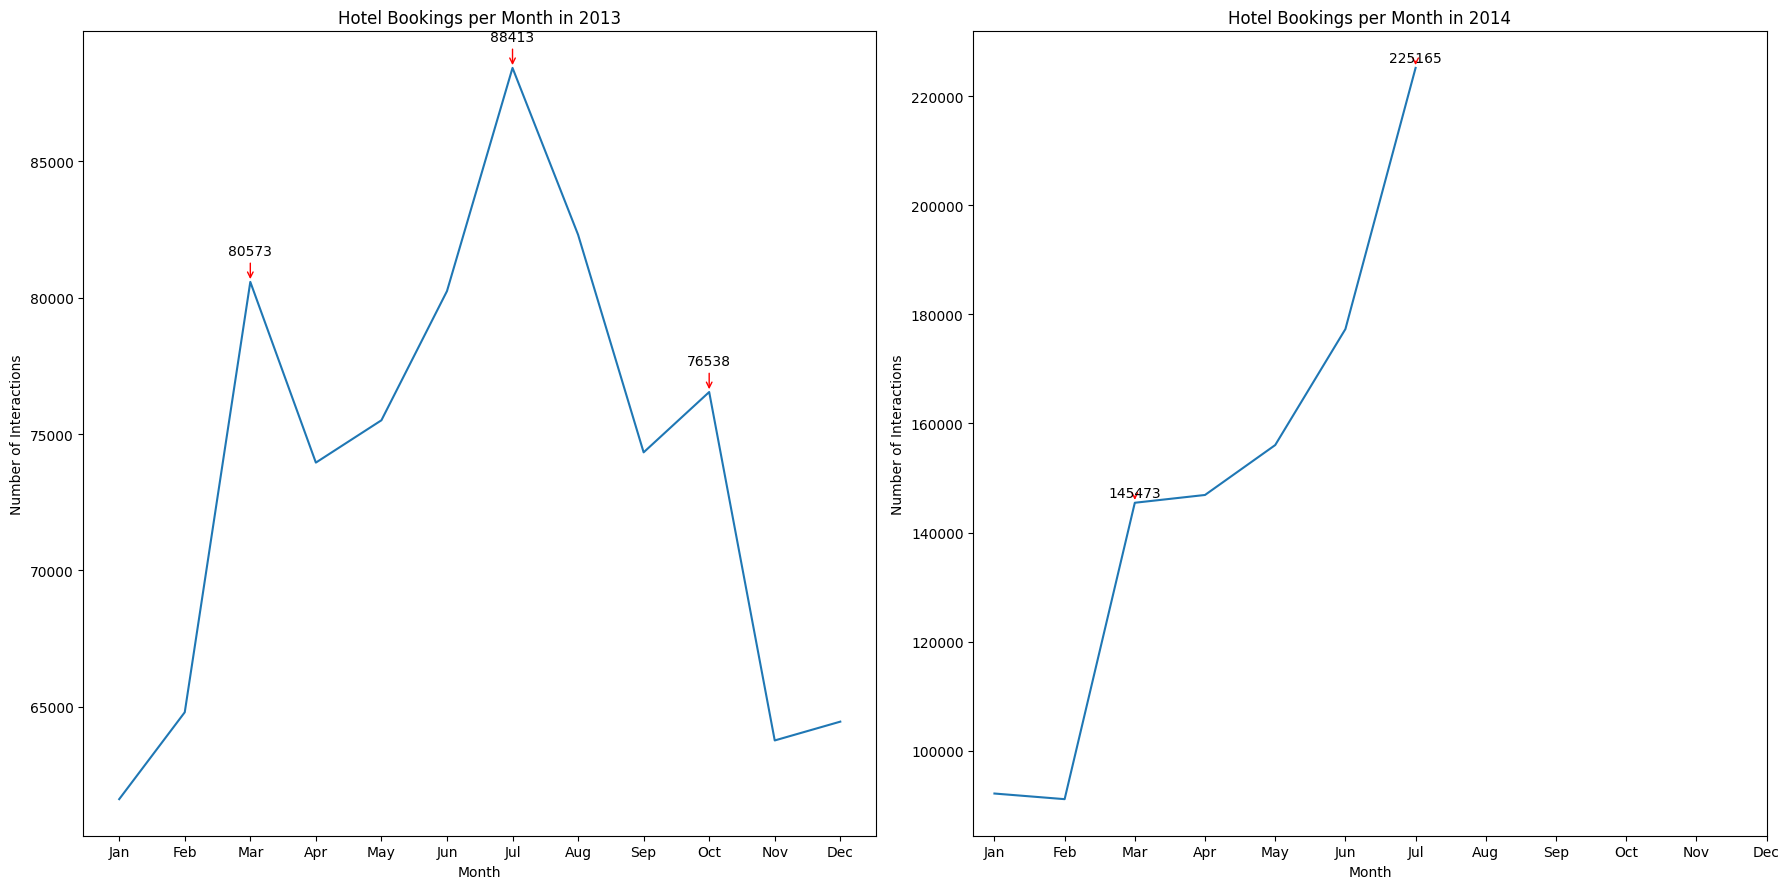

In [655]:
# Filter the data for the year 2013
data_2013 = hotel_clean[hotel_clean['date_time'].dt.year == 2013]

# Filter the data for the year 2014
data_2014 = hotel_clean[hotel_clean['date_time'].dt.year == 2014]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Plot the number of hotel bookings per month in 2013
data_2013_counts = data_2013['date_time'].dt.month.value_counts().sort_index()
data_2013_counts.plot(ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Interactions')
axes[0].set_title('Hotel Bookings per Month in 2013')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add labels for specific months in 2013
for month, count in data_2013_counts.items():
    if month in [3, 7, 10]:
        axes[0].annotate(f'{count}', xy=(month, count), xytext=(month, count + 1000),
                         ha='center', fontsize=10, arrowprops={'arrowstyle': '->', 'lw': 1, 'color': 'red'})

# Plot the number of hotel bookings per month in 2014
data_2014_counts = data_2014['date_time'].dt.month.value_counts().sort_index()
data_2014_counts.plot(ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Interactions')
axes[1].set_title('Hotel Bookings per Month in 2014')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add labels for specific months in 2014
for month, count in data_2014_counts.items():
    if month in [3, 7]:
        axes[1].annotate(f'{count}', xy=(month, count), xytext=(month, count + 1000),
                         ha='center', fontsize=10, arrowprops={'arrowstyle': '->', 'lw': 1, 'color': 'red'})

# Display the combined plot
plt.tight_layout()
plt.show()

The data reveals distinct patterns in website traffic throughout the year 2013. At the beginning and end of the year, there were notably lower levels of activity. However, during the summer vacation month of July, as well as in March and October, there were significant peaks in website traffic.


On the contrary, 2014 marked a significant increase in website traffic. July stood out as the busiest month, being the latest month for which we have data. Conversely, the year began with relatively lower activity in January and February. Notably, we still observed distinct spikes in traffic during March and July, reminiscent of the patterns seen in 2013.

As observed, there is a significant increase in the number of interactions from 2013 to 2014. The highest number of interactions in 2014 reached 225,165, while in 2013, it was 88,413.

In [560]:
# # Filter the data for the year 2013
# data_2013 = hotel_clean[hotel_clean['date_time'].dt.year == 2013]

# # Filter the data for the year 2014
# data_2014 = hotel_clean[hotel_clean['date_time'].dt.year == 2014]

# # Create a figure with two subplots
# fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# # Plot the number of hotel bookings per month in 2013
# data_2013['date_time'].dt.month.value_counts().sort_index().plot(ax=axes[0])
# axes[0].set_xlabel('Month')
# axes[0].set_ylabel('Number of Interactions')
# axes[0].set_title('Hotel Bookings per Month in 2013')
# axes[0].set_xticks(range(1, 13))
# axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# # Plot the number of hotel bookings per month in 2014
# data_2014['date_time'].dt.month.value_counts().sort_index().plot(ax=axes[1])
# axes[1].set_xlabel('Month')
# axes[1].set_ylabel('Number of Interactions')
# axes[1].set_title('Hotel Bookings per Month in 2014')
# axes[1].set_xticks(range(1, 13))
# axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# # Display the combined plot
# plt.tight_layout()
# plt.show()


#### Making an analysis in column `site_name` <a class= 'anchor' id = '2'></a> 

In [561]:
# Check the percentage of each `site_name`
website_count = hotel_clean['site_name'].value_counts()
total_count = len(hotel_clean)

percentages = (website_count / total_count) * 100
percentages

site_name
2    75.14
11    8.94
34    7.44
8     2.62
23    2.39
13    1.74
26    0.33
37    0.33
24    0.28
10    0.27
40    0.19
22    0.11
19    0.05
17    0.04
25    0.02
28    0.02
30    0.01
18    0.01
33    0.01
15    0.01
29    0.01
21    0.01
35    0.01
32    0.00
20    0.00
27    0.00
14    0.00
7     0.00
36    0.00
41    0.00
53    0.00
9     0.00
6     0.00
31    0.00
48    0.00
16    0.00
38    0.00
46    0.00
45    0.00
Name: count, dtype: float64

In [562]:
# Check the number of unique `site_names`
hotel_clean['site_name'].nunique()

39

In [563]:
# Check the `site_name` with the percentage less than 1%
percentage_less_than_1 = percentages <= 1
percentage_less_than_1.value_counts()

count
True     33
False     6
Name: count, dtype: int64

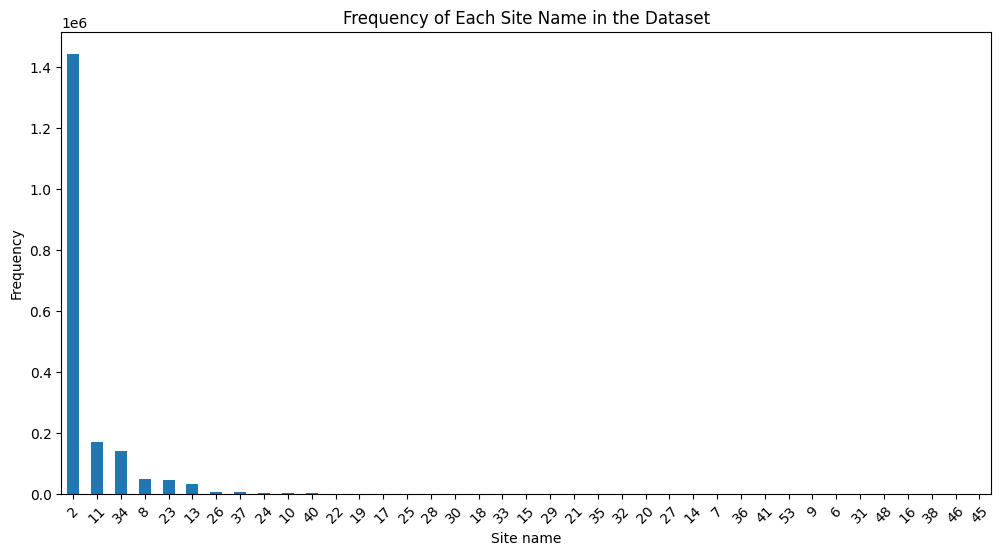

In [564]:
site_counts = hotel_clean['site_name'].value_counts()

# Sort the site by frequency in descending order
site_counts = site_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
site_counts.plot(kind='bar')
plt.xlabel('Site name')
plt.ylabel('Frequency')
plt.title('Frequency of Each Site Name in the Dataset')
plt.xticks(rotation=45) 

# Show the plot
plt.show()

A vast majority of customers, approximately 75.14%, are visiting website 2, while the remaining 33 out of 39 websites (such as Expedia.com, Expedia.co.uk, Expedia.co.jp) each receive less than 1% of customer interactions. This distribution is clearly skewed, as illustrated in the graph.

#### Making an analysis in cloumn `posa_continent` <a class= 'anchor' id = '3'></a> 

In [565]:
# Check the unique values for `posa_continent`
hotel_clean['posa_continent'].unique()

array([3, 1, 4, 0, 2])

In [566]:
filtered_data = hotel_clean[hotel_clean['site_name'] == 2]

# Print the filtered data
print(filtered_data['posa_continent'].unique())

[3]


In [567]:
filtered_data = hotel_clean[hotel_clean['site_name'] == 40]

# Print the filtered data
print(filtered_data['posa_continent'].unique())

[3]


In [568]:
filtered_data = hotel_clean[hotel_clean['posa_continent'] == 3]

# Print the filtered data
print(filtered_data['site_name'].unique())

[ 2 11 34 40 19 41]


In [569]:
filtered_data = hotel_clean[hotel_clean['posa_continent'] == 1]

# Print the filtered data
print(filtered_data['site_name'].unique())

[13 37 23  7 21 17 28 29 15 16 32 53 14  9]


In [570]:
filtered_data = hotel_clean[hotel_clean['posa_continent'] == 4]

# Print the filtered data
print(filtered_data['site_name'].unique())

[ 8 30]


In [571]:
filtered_data = hotel_clean[hotel_clean['posa_continent'] == 0]

# Print the filtered data
print(filtered_data['site_name'].unique())

[26 10  6]


In [572]:
filtered_data = hotel_clean[hotel_clean['posa_continent'] == 2]

# Print the filtered data
print(filtered_data['site_name'].unique())

[24 22 27 25 35 36 33 20 18 31 38 46 48 45]


The data reveals that there are five distinct continents, denoted by the labels 3, 1, 4, 0, and 2. These continent labels are linked to specific sets of site names, representing various access points for Expedia's website users. Notably, each site name is typically exclusive to a single continent, except for the case of `posa_continent` 40 and 2, both of which share the same `site_name` labeled as 3.

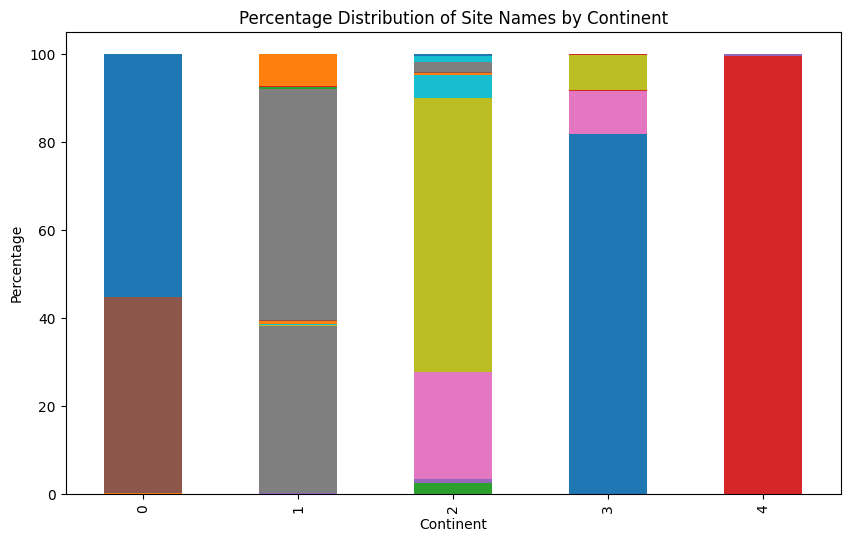

In [573]:
# Group the data by `posa_continent` and `site_name` and count the occurrences
grouped_data = hotel_clean.groupby(['posa_continent', 'site_name']).size().unstack(fill_value=0)

# Calculate the total count for each 'posa_continent'
total_counts = grouped_data.sum(axis=1)

# Calculate the percentage for each 'site_name'
percentage_data = grouped_data.divide(total_counts, axis=0) * 100

# Create a stacked bar plot with percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot with labels and titles
plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Site Names by Continent')

# Remove the legend
ax.get_legend().remove()

# Show the plot
plt.show()

In [574]:
# getting the percentage 
df_filtered = percentage_data[percentage_data > 0]
df_filtered.head(5)

site_name,2,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,45,46,48,53
posa_continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,0.18,NaN,NaN,NaN,44.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.06,NaN,0.03,NaN,NaN,38.15,0.06,0.19,0.01,0.87,NaN,NaN,NaN,0.13,NaN,52.55,NaN,NaN,NaN,NaN,0.38,0.15,NaN,NaN,0.11,NaN,NaN,NaN,NaN,7.28,NaN,NaN,NaN,NaN,NaN,NaN,0.03
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.39,NaN,0.97,NaN,24.23,NaN,62.41,5.11,NaN,0.64,NaN,NaN,NaN,0.18,NaN,2.19,NaN,1.27,0.46,NaN,0.02,NaN,NaN,0.02,0.02,0.07,NaN
3,81.89,NaN,NaN,NaN,NaN,NaN,9.74,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.11,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,99.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This graphic provides valuable insights into the distribution of websites among different continents in terms of percentages. Evidently, each continent hosts multiple site names, and there are variations in the percentage distribution among them.

#### Making an analysis in column `user_location_country` <a class= 'anchor' id = '4'></a> 

In [575]:
# Check the number of unique values in `user_location_country` 
hotel_clean['user_location_country'].nunique()

21

In [576]:
# Check the unique numbers in `user_location_country` 
hotel_clean['user_location_country'].unique()

array([ 66, 205,  46,  77, 215,   1,  63, 182,  69,   0,  85,  43,  16,
        55, 202, 141, 209,  35,  31, 206, 130])

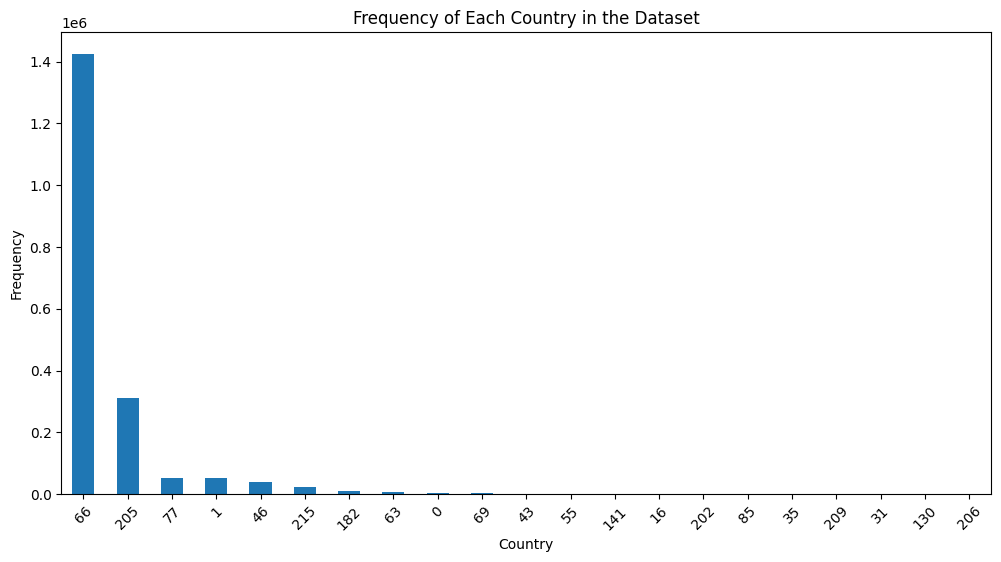

In [577]:
# Counting the countries
country_counts = hotel_clean['user_location_country'].value_counts()

# Sort the countries by frequency in descending order
country_counts = country_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Frequency of Each Country in the Dataset')
plt.xticks(rotation=45) 

# Show the plot
plt.show()

This graphic illustrates that out of the 21 countries, country 66 stands out with the highest level of customer engagement, while others have relatively low engagement.

In [578]:
# Check the top 10 in the dataset
hotel_clean.head(10)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
3,2014-04-10 18:17:35,2,3,66,258,4687,5581.49,179461,1,0,9,2014-08-11,2014-08-13,2,0,1,792,1,0,1,6,208,1480,67
8,2014-07-15 13:46:54,2,3,66,184,2037,611.80,488305,0,1,0,2014-12-25,2014-12-28,2,4,1,8250,1,0,1,2,50,628,45
11,2013-03-23 20:00:06,11,3,66,442,55448,189.41,1124094,1,0,9,2013-03-24,2013-03-25,2,1,1,26862,6,0,4,2,50,745,5
13,2013-08-10 18:33:14,2,3,66,467,10851,1331.84,109659,1,0,9,2013-10-09,2013-10-11,2,0,1,12206,6,0,1,2,50,628,79
14,2014-01-16 08:31:44,2,3,66,174,55922,95.00,647367,0,0,2,2014-01-17,2014-01-18,2,0,1,24282,6,0,3,2,50,355,48
17,2014-05-26 09:38:07,2,3,66,442,16876,802.89,468780,0,0,0,2014-06-19,2014-06-23,6,0,2,8250,1,0,1,2,50,628,47
19,2014-06-05 17:11:08,2,3,66,220,2086,4693.50,914800,0,0,1,2014-06-29,2014-07-01,4,0,1,8788,1,1,1,6,77,2,5
21,2014-03-07 17:19:24,2,3,66,153,20706,96.39,203682,0,0,0,2014-04-17,2014-04-18,4,0,2,23693,1,0,1,2,50,1634,37
22,2013-02-02 09:20:50,11,3,205,135,36086,8192.95,807185,0,0,9,2013-02-22,2013-02-26,2,1,1,8286,1,0,2,0,63,1258,98
23,2013-06-29 03:30:21,2,3,66,260,31773,374.79,683348,1,0,2,2013-07-06,2013-07-13,1,0,1,27006,6,0,1,2,50,895,35


#### Making an analysis in columns `user_location_region` and `user_location_city` <a class= 'anchor' id = '5'></a> 

In [579]:
# Check the number of unique values
hotel_clean['user_location_region'].nunique()

218

In [580]:
# Check the number of unique values
hotel_clean['user_location_city'].nunique()

8456

In [581]:
# Showing the unique values
hotel_clean['user_location_region'].unique()

array([ 258,  184,  442,  467,  174,  220,  153,  135,  260,  315,  171,
        311,  824,  337,  348,  325,  354,  155,  462,  322,  363,  403,
        293,  346,  646,  226,  447,  448,  871,  395,  318,  436,  459,
        351,  196,  977,  143,  385,  356,  157,  431,  331,  314,  172,
        288,  392,  189,  869,  352,  245,  340,  411,  480,  335,  256,
        430,  343,  312,  149,  715,  198,  435,  333,  294,  158,  330,
        416,  321,  393,  332,  316,  327,  246,  596,  324,  142,  244,
        347,  296,  215,  254,  329,  336,  451,  339,  160,  401,  298,
        404,  452,  520,  229,  474,  476,  368,  727,  365,  165,  145,
        919,  414,  439,  441,  366,  219,  199,  986,  408,  259,  376,
        453,  216,  398,  341,  370,  167,  457,  400,  471,  364,  479,
       1017,  187,  788,  367,  424,  147,  151,  317,  236,  947,  344,
        242,  417,  218,  209,  374,  178,  460,  162,  554,  942,  425,
        313,  382,  188,  154,  418,  677,  391,  3

It's evident that in this dataset containing 218 distinct regions and a total of 8,456 unique cities.

#### Making an analysis in column `orig_destination_distance` <a class= 'anchor' id = '6'></a> 

In [582]:
# Check the number of unique values
hotel_clean['orig_destination_distance'].nunique()

1406840

In [583]:
# Check the median
hotel_clean['orig_destination_distance'].median()

1168.386

In [584]:
# Set the float format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Describe
column_description = hotel_clean['orig_destination_distance'].describe()
print(column_description)

count   1920731.00
mean       1975.54
std        2208.04
min           0.01
25%         324.29
50%        1168.39
75%        2561.82
max       12280.48
Name: orig_destination_distance, dtype: float64


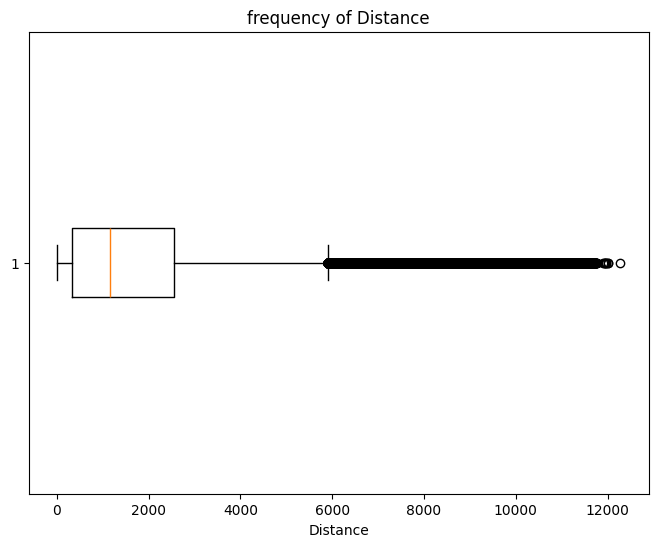

In [585]:
# Plotting
plt.figure(figsize=(8, 6))
plt.boxplot(hotel_clean['orig_destination_distance'], vert=False)  
plt.title('frequency of Distance')
plt.xlabel('Distance')
plt.show()

The majority of distances between hotels and customers during their searches are below 3000, with an average distance of approximately 1975.54. Furthermore, we observe that both the minimum and maximum distances exhibit significant variation. The maximum distance recorded is as high as 12280.48, while the minimum is a mere 0.01. Additionally, the median distance shows that 50% of customers search for hotels at a location of approximately 1168.39.

#### Making an analysis in column `user_id` <a class= 'anchor' id = '7'></a> 

In [586]:
# Check the number of unique values
hotel_clean['user_id'].nunique()

494167

In [587]:
# Average of interaction
customer_frequency = hotel_clean['user_id'].value_counts()

# Calculate the average frequency
average_frequency = customer_frequency.mean()

print(f'Average Frequency of Customer Interactions: {average_frequency:.2f}')

Average Frequency of Customer Interactions: 3.89


The mean interaction frequency per customer is approximately 3.89, this insight provides a valuable understanding of customer engagement.

#### Naking an analysis in column `is_mobile` <a class= 'anchor' id = '8'></a> 

In [588]:
# Checking if the interaction is on a mobile device or not
hotel_clean['is_mobile'].value_counts() / len(hotel_clean) * 100

is_mobile
0   87.05
1   12.95
Name: count, dtype: float64

In this dataset, the vast majority of customers, accounting for 87.05%, accessed the website from non-mobile devices, while the remaining 12.95% accessed it from mobile devices.

#### Making an analysis in column `is_package` <a class= 'anchor' id = '9'></a> 

In [589]:
# The percentage of interaction with package
hotel_clean['is_package'].value_counts() / len(hotel_clean) * 100

is_package
0   75.39
1   24.61
Name: count, dtype: float64

Within this dataset, the majority of clicks/bookings, totaling 75.39%, were d. In contrast, 24.61% of the interactions involved such combined packages.

#### Making an analysis in column `channel` <a class= 'anchor' id = '10'></a> 

In [590]:
# Checke the unique values 
hotel_clean['channel'].unique()

array([ 9,  0,  2,  1,  5,  3,  6,  7,  4,  8, 10])

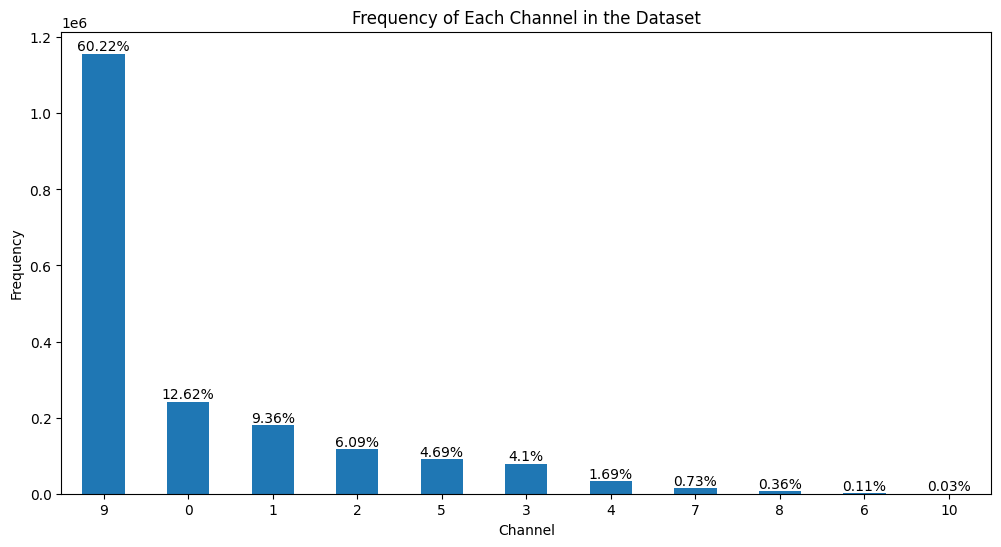

In [591]:
# Counting the channel
channel_counts = hotel_clean['channel'].value_counts()

# Sort the channel by frequency in descending order
channel_counts = channel_counts.sort_values(ascending=False)

# Calculate the percentages
percentages = (channel_counts / len(hotel_clean) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = channel_counts.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.title('Frequency of Each Channel in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(channel_counts, percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

We observe that among the 11 available ID channels, a significant majority, comprising 60.22%, is associated with Channel 9. Additionally, there are four channels, each contributing less than 1% to the dataset.

#### Making an analysis in columns `srch_ci`, `srch_co` and `number_of_days` <a class= 'anchor' id = '11'></a> 

In [592]:
# Show the first 10
hotel_clean['srch_ci'].head(10)

3     2014-08-11
8     2014-12-25
11    2013-03-24
13    2013-10-09
14    2014-01-17
17    2014-06-19
19    2014-06-29
21    2014-04-17
22    2013-02-22
23    2013-07-06
Name: srch_ci, dtype: object

In [593]:
# Show the first 10
hotel_clean['srch_co'].head(10)

3     2014-08-13
8     2014-12-28
11    2013-03-25
13    2013-10-11
14    2014-01-18
17    2014-06-23
19    2014-07-01
21    2014-04-18
22    2013-02-26
23    2013-07-13
Name: srch_co, dtype: object

In [594]:
# Cheking the type 
hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920731 entries, 3 to 4670290
Data columns (total 24 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    object        
 12  srch_co                    object        
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64         

In [595]:
# Convert date columns to datetime objects
hotel_clean['srch_ci'] = pd.to_datetime(hotel_clean['srch_ci'])
hotel_clean['srch_co'] = pd.to_datetime(hotel_clean['srch_co'])

In [596]:
# Sanity check
hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920731 entries, 3 to 4670290
Data columns (total 24 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    datetime64[ns]
 12  srch_co                    datetime64[ns]
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64         

In [597]:
# Creating a new column indicating the number of days they will spend at the hotel
hotel_clean['number_of_days'] = (hotel_clean['srch_co'] - hotel_clean['srch_ci']).dt.days
hotel_clean['number_of_days'] 

3           2
8           3
11          1
13          2
14          1
           ..
4670284     1
4670285     1
4670287     4
4670288     2
4670290    11
Name: number_of_days, Length: 1920731, dtype: int64

In [598]:
# Checking the number of unique values
hotel_clean['number_of_days'].nunique()

119

In [599]:
# Percentage of number of days in the hotel
hotel_clean['number_of_days'].value_counts() / len(hotel_clean) * 100

number_of_days
1     27.80
2     20.53
3     16.95
4     11.98
5      6.86
       ... 
365    0.00
118    0.00
155    0.00
367    0.00
147    0.00
Name: count, Length: 119, dtype: float64

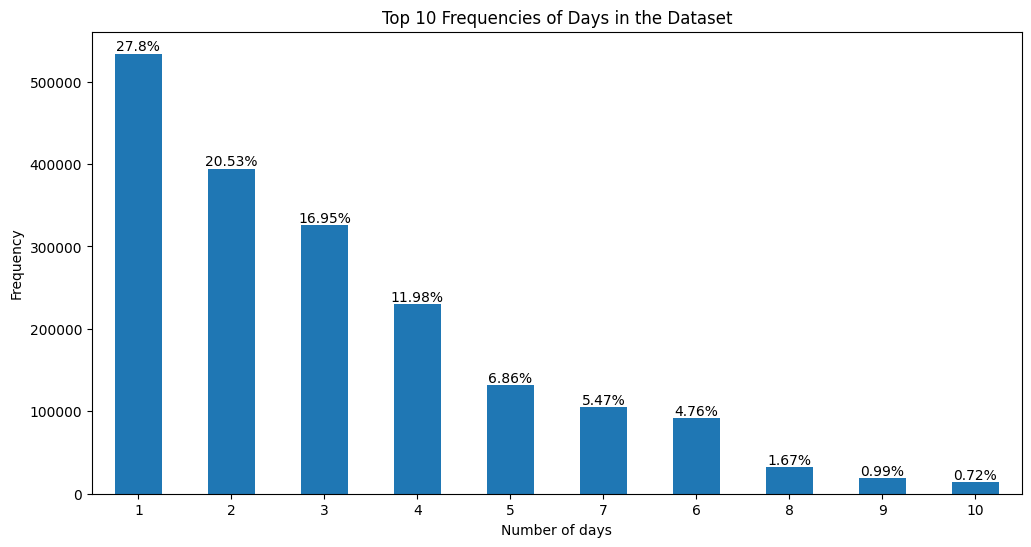

In [600]:
# Counting the days
channel_counts = hotel_clean['number_of_days'].value_counts()

# Sort the days by frequency in descending order
channel_counts = channel_counts.sort_values(ascending=False)

# Calculate the percentages
percentages = (channel_counts / len(hotel_clean) * 100).round(2)

# Select the top 10 records
top_10_channel_counts = channel_counts.head(10)
top_10_percentages = percentages.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = top_10_channel_counts.plot(kind='bar')
plt.xlabel('Number of days')
plt.ylabel('Frequency')
plt.title('Top 10 Frequencies of Days in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(top_10_channel_counts, top_10_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

This graphic highlights the top 10 search durations for hotel stays. Notably, around 27.8% of users opt for single-day hotel stays. In contrast, individuals planning extended stays of over ten days make up a minority, amounting to less than 1% of the searches.

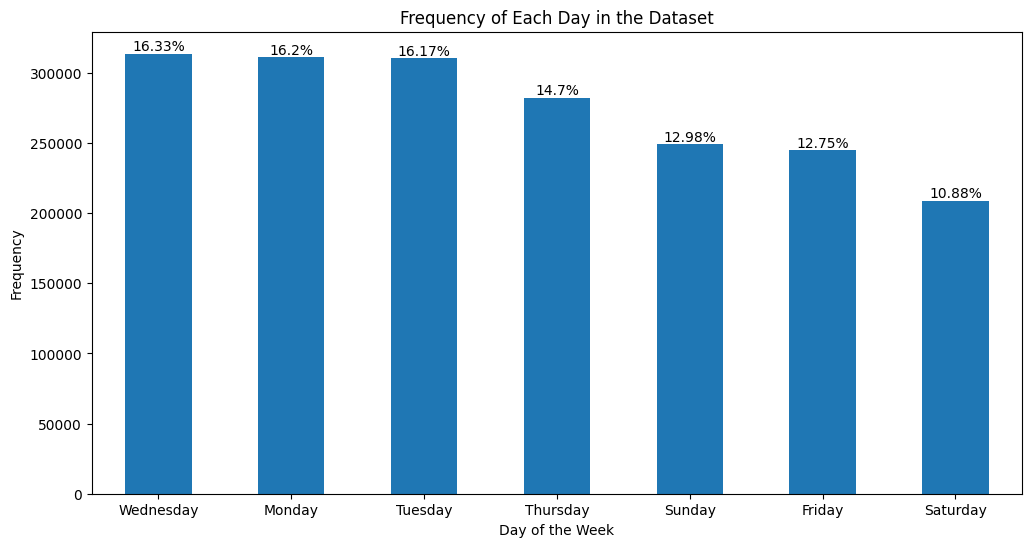

In [601]:
# Calculating the percentages.
hotel_day = hotel_clean['date_time'].dt.day_name()

# Then, count the occurrences of each day
day_counts = hotel_day.value_counts()

# Sort the days by frequency in descending order
day_counts = day_counts.sort_values(ascending=False)

# Calculate the percentages
day_percentages = (day_counts / len(hotel_clean) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = day_counts.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of Each Day in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(day_counts, day_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()


Wednesday, closely followed by Monday and Tuesday, is the day of the week when users are most active in terms of clicking and making bookings on the website. Conversely, activity is at its lowest on weekends, indicating reduced user engagement during that time.

In [602]:
# Showing the first 10
hotel_clean['srch_co'].head(10)

3    2014-08-13
8    2014-12-28
11   2013-03-25
13   2013-10-11
14   2014-01-18
17   2014-06-23
19   2014-07-01
21   2014-04-18
22   2013-02-26
23   2013-07-13
Name: srch_co, dtype: datetime64[ns]

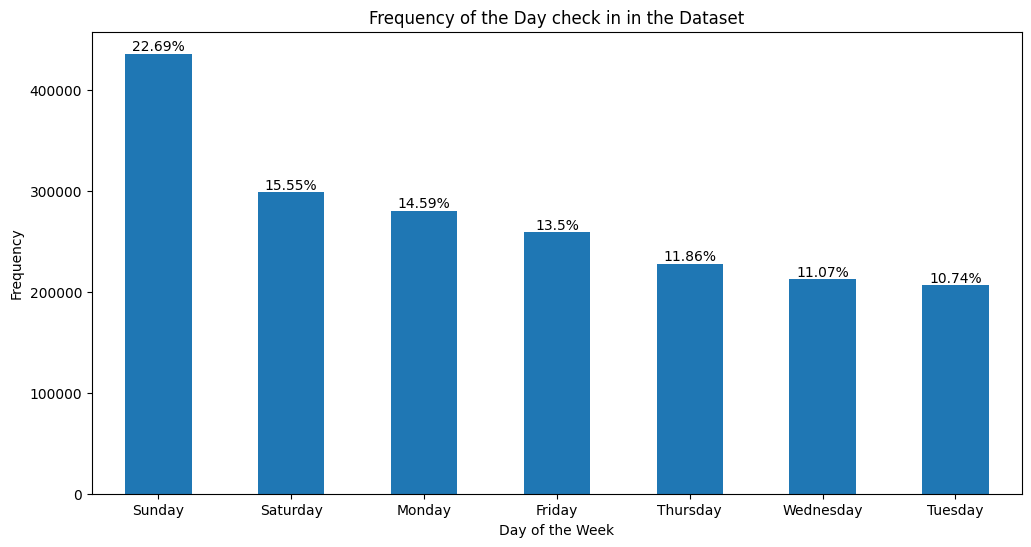

In [603]:
# Plotting a graph

checkin_day = hotel_clean['srch_co'].dt.day_name()

# Then, count the occurrences of each day
checkin_counts = checkin_day.value_counts()

# Sort the days by frequency in descending order
checkin_counts = checkin_counts.sort_values(ascending=False)

# Calculate the percentages
checkin_percentages = (checkin_counts / len(hotel_clean) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = checkin_counts.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of the Day check in in the Dataset')
plt.xticks(rotation=0)


# Adding labels to the top of the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(checkin_counts, checkin_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')


# Show the plot
plt.show()

Sunday is the most popular day of the week for customers to make clicks/bookings for their check-in days.

#### Making an analysis in columns `srch_adults_cnt`, `srch_children_cnt` and `srch_rm_cnt` <a class= 'anchor' id = '12'></a> 

In [604]:
# Show the column `srch_adults_cnt`
hotel_clean['srch_adults_cnt']

3          2
8          2
11         2
13         2
14         2
          ..
4670284    1
4670285    2
4670287    2
4670288    2
4670290    1
Name: srch_adults_cnt, Length: 1920731, dtype: int64

In [605]:
# Check the unique values
sorted(hotel_clean['srch_adults_cnt'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [606]:
# Checking the number when the column is iguals to 0
(hotel_clean['srch_adults_cnt'] == 0).sum()

3947

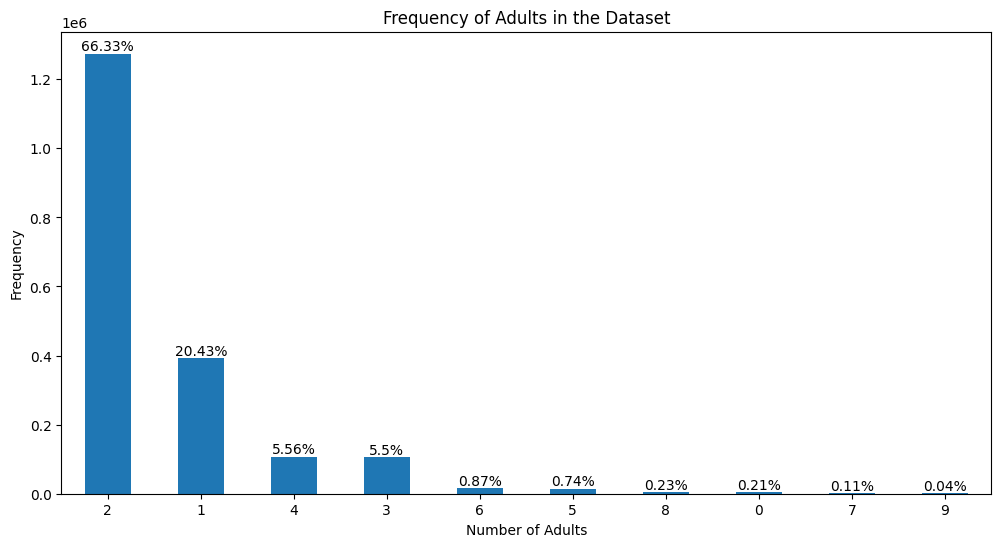

In [607]:
# Then, count the occurrences of adults
adults_counts = (hotel_clean['srch_adults_cnt'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
adults_percentages = (adults_counts / len(hotel_clean) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = adults_counts.plot(kind='bar')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.title('Frequency of Adults in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(adults_counts, adults_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

The majority of clicks and bookings are made for 2 adults. Furthermore, bookings for 5 or more adults are relatively rare. This suggests that the most common scenario involves couples booking hotels. Now, let's shift our focus to the presence of children.

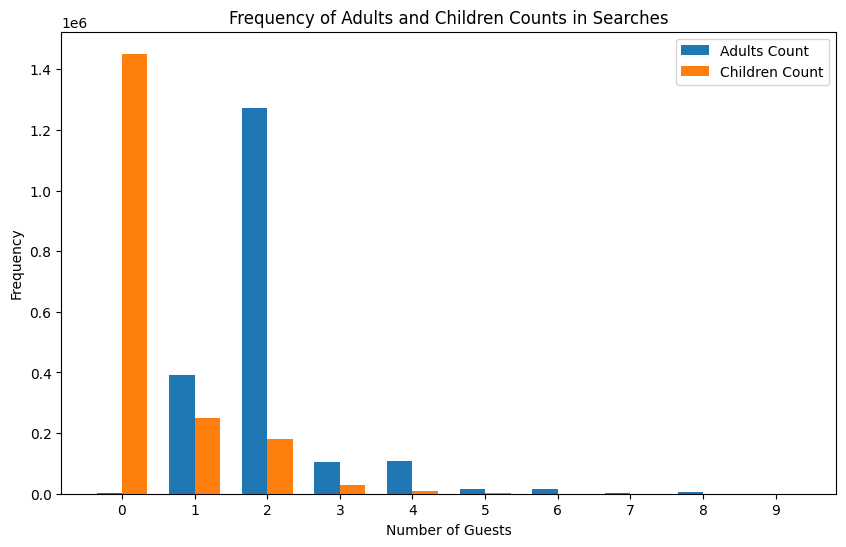

In [608]:
# Count the occurrences of each unique value in 'srch_adults_cnt'
adults_counts = hotel_clean['srch_adults_cnt'].value_counts().sort_index()

# Count the occurrences of each unique value in 'srch_children_cnt'
children_counts = hotel_clean['srch_children_cnt'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
width = 0.35
x = range(len(adults_counts))

plt.bar(x, adults_counts, width, label='Adults Count')
plt.bar([i + width for i in x], children_counts, width, label='Children Count')

# Customize the plot with labels and titles
plt.xlabel('Number of Guests')
plt.ylabel('Frequency')
plt.title('Frequency of Adults and Children Counts in Searches')
plt.xticks([i + width/2 for i in x], adults_counts.index)

# Show the plot
plt.legend()
plt.show()


The frequency decreases as the number of children increases.

In [609]:
# Check the unique values
sorted(hotel_clean['srch_children_cnt'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

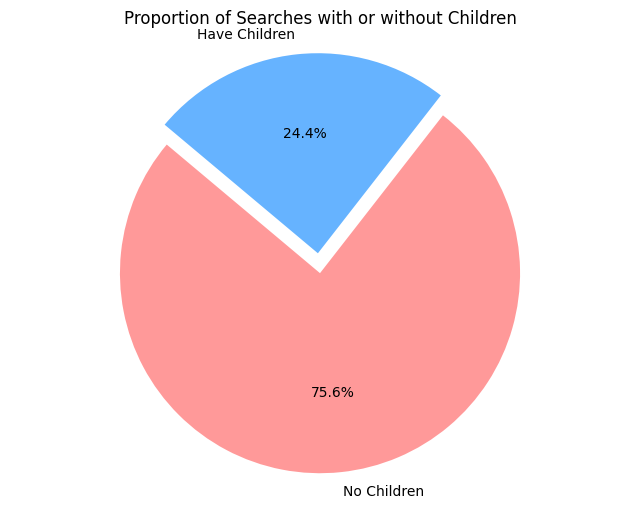

In [610]:
# Count occurrences of 0 in the column
count_of_zeros = (hotel_clean['srch_children_cnt'] == 0).sum()

# Count occurrences of non-zero values in the column
count_of_non_zeros = (hotel_clean['srch_children_cnt'] != 0).sum()

# Data for the pie chart
labels = ['No Children', 'Have Children']
sizes = [count_of_zeros, count_of_non_zeros]
colors = ['#ff9999', '#66b3ff']  # Custom colors

# Explode the 'Have Children' slice
explode = (0, 0.1)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Proportion of Searches with or without Children')
plt.show()

In the following graphic, we observe that a significant portion of searches on the website doesn't include children.

In [611]:
# Check the number of unique values
hotel_clean['srch_rm_cnt'].unique()

array([1, 2, 4, 5, 3, 7, 8, 6, 0])

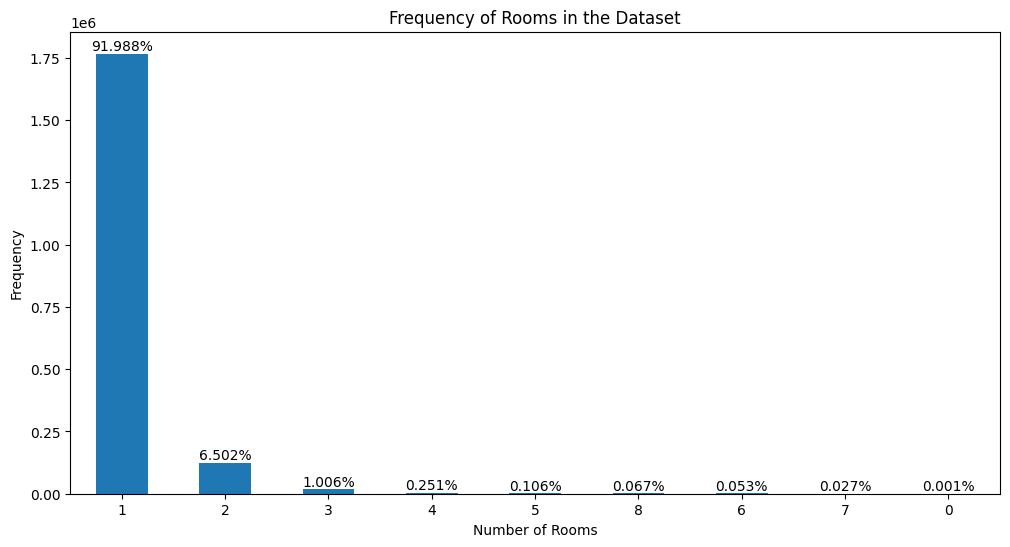

In [612]:
# Then, count the occurrences of each day
room_counts = (hotel_clean['srch_rm_cnt'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
room_percentages = (room_counts / len(hotel_clean) * 100).round(3)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = room_counts.plot(kind='bar')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.title('Frequency of Rooms in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(room_counts, room_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

Given that a substantial portion of clicks/bookings is for couples (two adults), it's logical to observe that most searches correspond to a single room. The prevalence of single-room bookings begins to diminish as the number of rooms requested increases.

#### Making an analysis in columns `srch_destination_id` and `srch_destination_type_id` <a class= 'anchor' id = '13'></a> 

In [613]:
# Check the number of unique values
hotel_clean['srch_destination_id'].nunique()

26025

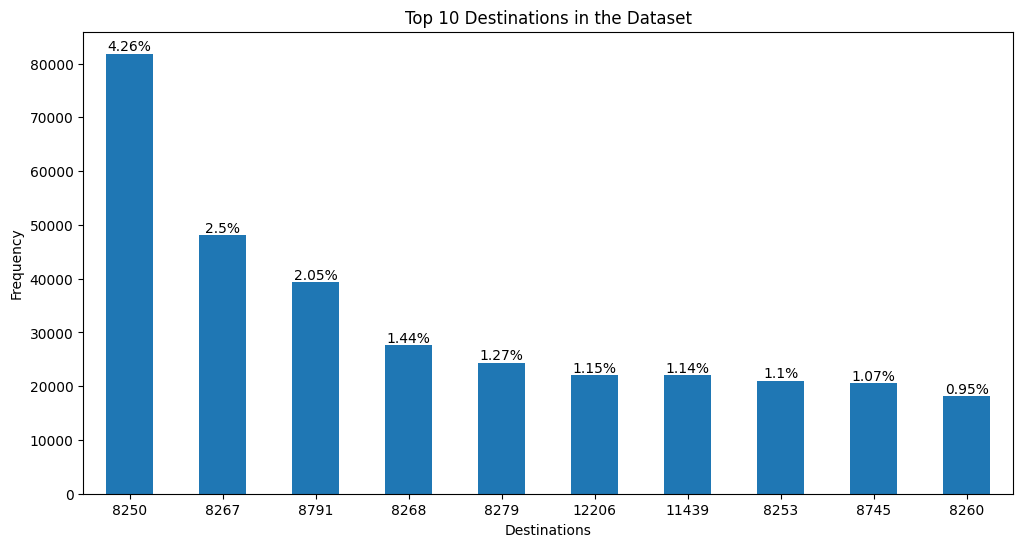

In [614]:
# Counting 
destination_counts = (hotel_clean['srch_destination_id'].value_counts()).sort_values(ascending = False)

# Calculate the percentages
destination_percentages = (destination_counts / len(hotel_clean) * 100).round(2)

# Select the top 10 records
top_10_destination_counts = destination_counts.head(10)
top_10_percentages = destination_percentages.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = top_10_destination_counts.plot(kind='bar')
plt.xlabel('Destinations')
plt.ylabel('Frequency')
plt.title('Top 10 Destinations in the Dataset')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(top_10_destination_counts, top_10_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()


This dataset encompasses 26,025 destinations, and the graphic highlights the top 10 most frequently searched destinations on the website. Despite the multitude of destination options, the top 1 choics account for only 4.26% of the total search frequency.

In [615]:
# Check the unique values
hotel_clean['srch_destination_type_id'].unique()

array([1, 6, 3, 5, 4, 8, 7, 9])

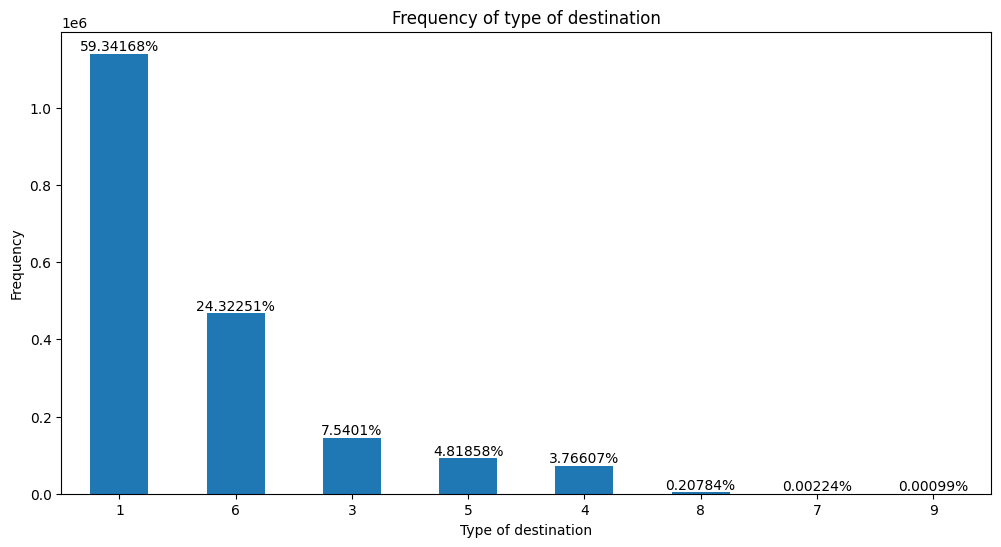

In [616]:
# Plotting the graph.

destination_type_counts = (hotel_clean['srch_destination_type_id'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
destination_type_percentages = (destination_type_counts / len(hotel_clean) * 100).round(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = destination_type_counts.plot(kind='bar')
plt.xlabel('Type of destination')
plt.ylabel('Frequency')
plt.title('Frequency of type of destination')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(destination_type_counts, destination_type_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

This graphic illustrates that the majority of destinations fall under type 1, while types 7 and 9 represent only a small fraction of the total destinations.

#### Making an analysis in column `is_booking` <a class= 'anchor' id = '14'></a> 

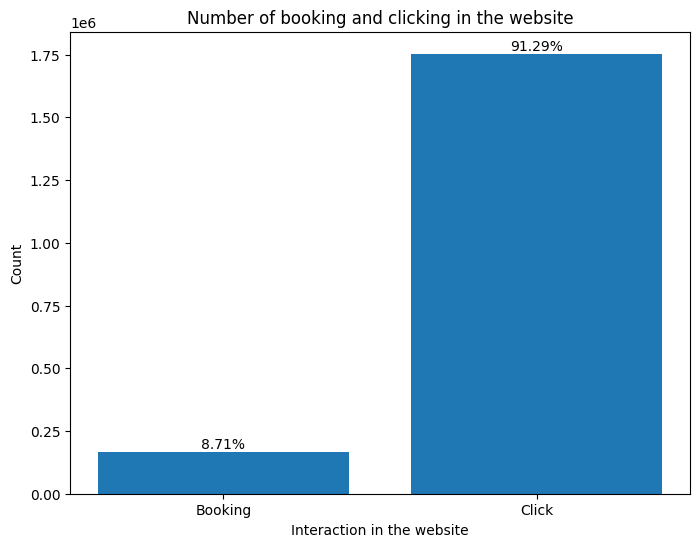

In [617]:
# Plotting the graph

# Count occurrences of 0 in the column
count_click = (hotel_clean['is_booking'] == 0).sum()

# Count occurrences of 1 in the column
count_booking = (hotel_clean['is_booking'] == 1).sum()

# Calculate the percentages
total = count_click + count_booking
percentage_click = (count_click / total) * 100
percentage_booking = (count_booking / total) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Booking', 'Click'], [count_booking, count_click])
plt.xlabel('Interaction in the website')
plt.ylabel('Count')
plt.title('Number of booking and clicking in the website')

# Show the percentages on top of the bars
plt.text(0, count_booking, f'{percentage_booking:.2f}%', ha='center', va='bottom')
plt.text(1, count_click, f'{percentage_click:.2f}%', ha='center', va='bottom')

plt.show()

Observing the data, it's evident that a substantial majority, amounting to 91.29%, of interactions on the website are merely clicks, whereas a more modest 8.71% represent actual bookings.

#### Making an analysis in column `cnt` <a class= 'anchor' id = '15'></a> 

In [618]:
# Checking the unique values
hotel_clean['cnt'].unique()

array([ 1,  4,  3,  2,  6,  8,  5,  7, 17, 13, 10, 15, 12, 20, 14,  9, 21,
       19, 16, 11, 22, 33, 24, 18, 26, 40, 28, 25, 31, 23, 27, 44, 29, 46,
       36, 48, 39, 45, 35, 37, 30, 42, 86, 32, 52, 47, 38, 58, 41, 76, 62,
       51, 34, 53, 82])

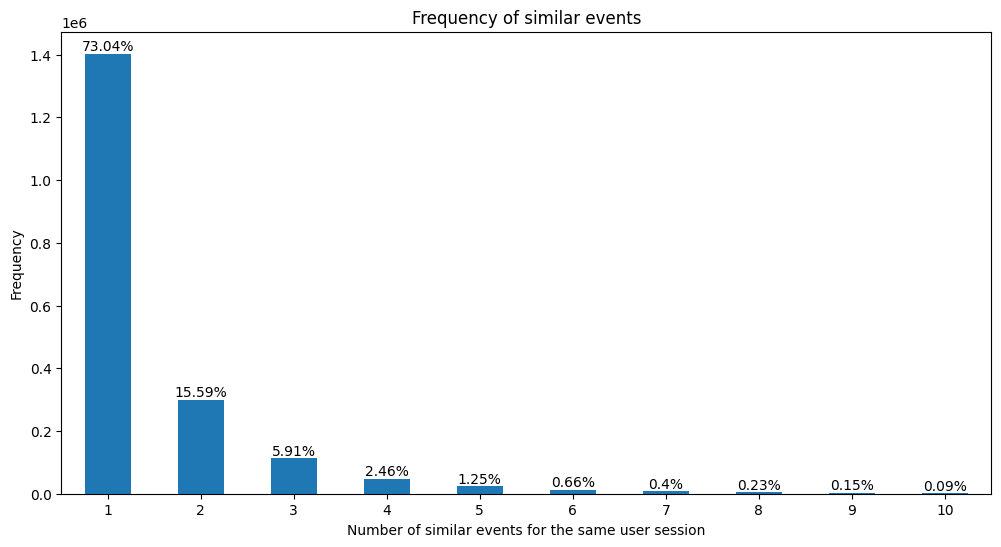

In [619]:
# Plotting the graph 

# Count the occurrences of each 
cnt_counts = (hotel_clean['cnt'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
cnt_percentages = (cnt_counts / len(hotel_clean) * 100).round(2)

# Select the top 10 records
top_10_cnt_counts = cnt_counts.head(10)
top_10_percentages = cnt_percentages.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = top_10_cnt_counts.plot(kind='bar')
plt.xlabel('Number of similar events for the same user session')
plt.ylabel('Frequency')
plt.title('Frequency of similar events')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(top_10_cnt_counts, top_10_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

The graph displays the top 10 similar events within the context of the same user session. It's evident that the percentage decreases as the number of similar interactions increases. Specifically, only 15.59% of events occur twice, while those occurring more than six times represent less than 1% of the total.

#### Making an analysis in columns `hotel_continent`, `hotel_country` and `hotel_market` <a class= 'anchor' id = '16'></a> 

In [620]:
# Check the unique values
hotel_clean['hotel_continent'].unique()

array([6, 2, 0, 4, 3, 5, 1])

In [621]:
# Check the unique values
hotel_clean['hotel_country'].unique()

array([208,  50,  77,  63, 144,   8, 204,  67, 198,   4, 170,  99, 196,
        51, 146,  47,  70, 107, 182, 105,  12,  96, 152, 163,   5, 171,
        22, 203, 106,   0,  17, 174,  32,  21, 121,  68,  38, 128, 169,
       130, 156,  31,  34, 125,  53,  46,  48,  73, 104, 136,   7, 140,
       122,  79, 119,  45, 186,  72, 126,  71,  11, 151, 159, 180, 135,
       194, 157, 147, 124,  82, 118, 168,  87,  15, 111, 108,  13,  93,
        80, 100,  26, 212, 141, 112, 193, 199, 110,  92, 206, 162,  52,
       127, 185,  36,  35,  58,  44, 158, 137,  98,  25, 202,   1, 131,
        20,  89,  27, 161,  83,  14,   9, 115,  81,  84, 134, 183, 200,
        64, 132, 188,  78,  57,  61, 148,  75,  33, 160, 153, 189, 179,
        10, 192, 165,  29,  76,  40,  28, 178,   2,  66,  19,  30, 102,
       201, 139,  88, 114,  24,  39, 177, 143, 142, 103, 191,  23, 166,
       181,  60, 116,   3, 211,   6,  42,  18, 133, 129, 195, 109, 197,
       120,  16, 101, 173, 184, 190,  97,  74, 167,  55,  54,  6

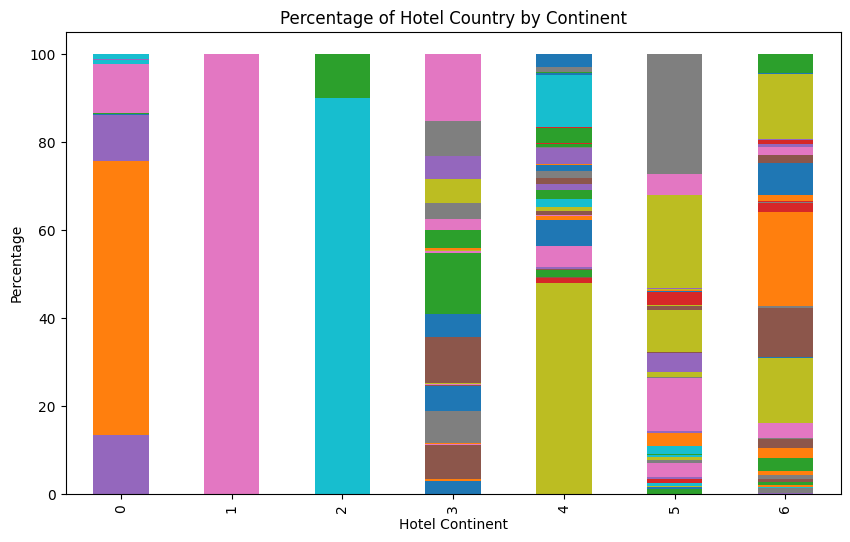

In [622]:
# Group the data by 'hotel_continent' and 'hotel_country' and count the occurrences
grouped_data = hotel_clean.groupby(['hotel_continent', 'hotel_country']).size().unstack(fill_value=0)

# Calculate the total count for each 'posa_continent'
total_counts = grouped_data.sum(axis=1)

# Calculate the percentage for each 'site_name'
percentage_data = grouped_data.divide(total_counts, axis=0) * 100

# Create a stacked bar plot with percentages
percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot with labels and titles
plt.xlabel('Hotel Continent')
plt.ylabel('Percentage')
plt.title('Percentage of Hotel Country by Continent')

# Show the plot without the legend
plt.legend().set_visible(False)
plt.show()


In this graph, it's evident that most continents have a diverse range of countries associated with customer interactions on the website. However, two continents stand out as exceptions. Continent 1 is represented by only one country with website interactions, while Continent 2 has just two countries contributing to interactions.

In [623]:
# Check the number of unique `hotel_country` in the `hotel_continent`
filtered_data = hotel_clean[hotel_clean['hotel_continent'] == 1]

# Print the filtered data
print(filtered_data['hotel_country'].unique())

[16]


In [624]:
# Check the number of unique `hotel_country` in the `hotel_continent`
filtered_data = hotel_clean[hotel_clean['hotel_continent'] == 2]

# Print the filtered data
print(filtered_data['hotel_country'].unique())

[ 50 198]


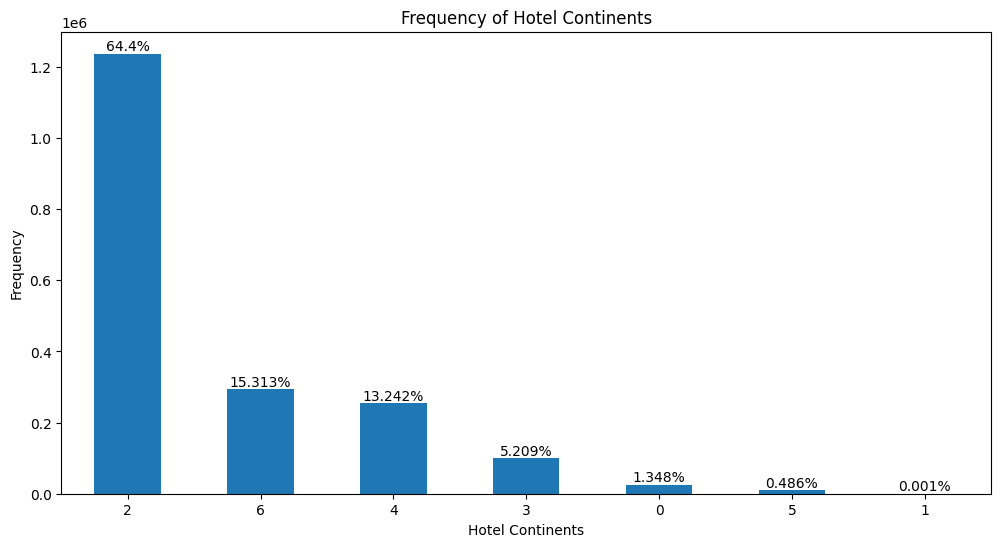

In [625]:
# Plotting the graph

# Then, count the occurrences of each 
continents_counts = (hotel_clean['hotel_continent'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
continents_percentages = (continents_counts / len(hotel_clean) * 100).round(3)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = continents_counts.plot(kind='bar')
plt.xlabel('Hotel Continents')
plt.ylabel('Frequency')
plt.title('Frequency of Hotel Continents')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(continents_counts, continents_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [626]:
# Check the number of unique `hotel_country` in the `hotel_continent`
filtered_data = hotel_clean[hotel_clean['hotel_continent'] == 2]

# Print the filtered data
print(filtered_data['hotel_country'].unique())

[ 50 198]


In [627]:
# Check the number of unique `hotel_country` in the `hotel_continent`
filtered_data = hotel_clean[hotel_clean['hotel_continent'] == 6]

# Print the filtered data
print(filtered_data['hotel_country'].unique())

[208  77 144 204   4 170  70 107 105  12  22  17  21  68 169  31  46   7
  79  72  71  11 159 180 135  15 111 212 199 206 127  58  44  20  83  14
   9 134 200  64  78  75  33  66  30 143 191 166 211  74  69 138  59]


The analysis reveals that the majority of website interactions are focused on continent 2, while continents 0, 5, and 1 experience considerably fewer interactions. Furthermore, within continent 2, customers concentrate on two specific countries, namely 50 and 198. With the exception of continents 1 and 2, the remaining continents exhibit a greater diversity of countries.

In [628]:
# Check the number of unique numbers
hotel_clean['hotel_market'].nunique()

2090

#### making an analysis in column `hotel_cluster` <a class= 'anchor' id = '17'></a> 

In [629]:
# Check the number of unique numbers
hotel_clean['hotel_cluster'].nunique()

100

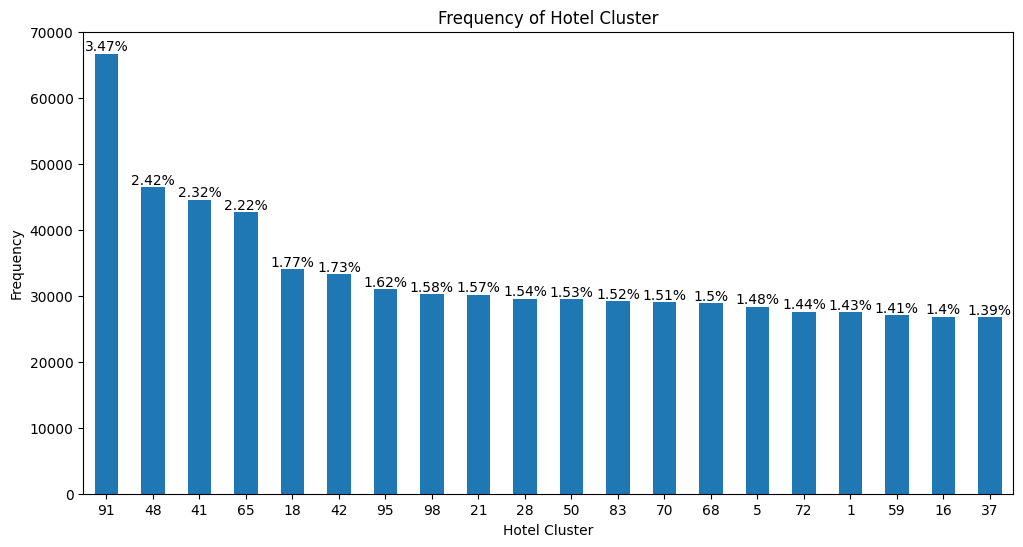

In [630]:
# Plotting the first 20

# Then, count the occurrences of each 
hotel_cluster_counts = (hotel_clean['hotel_cluster'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
hotel_cluster_percentages = (hotel_cluster_counts / len(hotel_clean) * 100).round(2)

# Select the top 20 records
top_20_counts = hotel_cluster_counts.head(20)
top_20_percentages = hotel_cluster_percentages.head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = top_20_counts.plot(kind='bar')
plt.xlabel('Hotel Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Hotel Cluster')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(top_20_counts, top_20_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

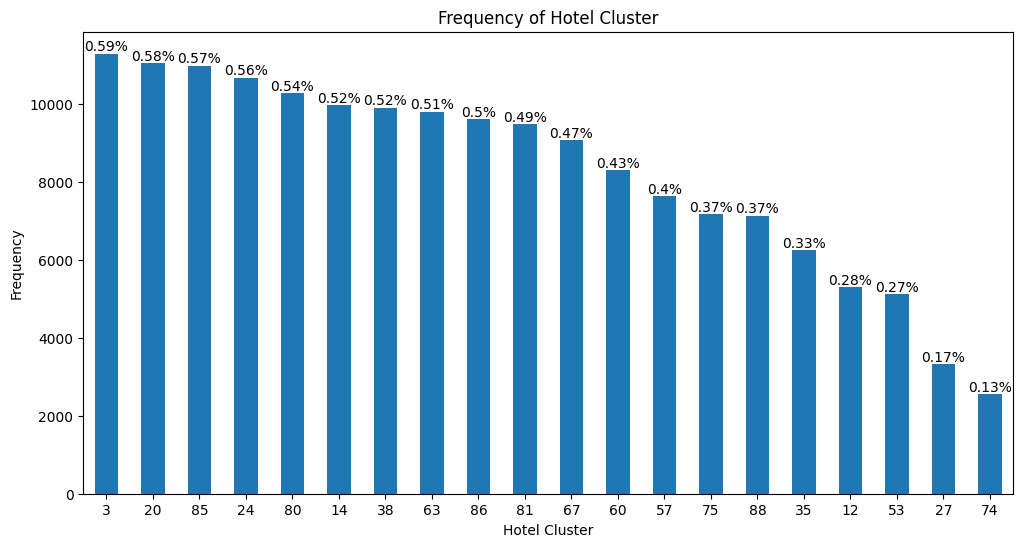

In [631]:
# Plotting the last 20

# Then, count the occurrences of each 
hotel_cluster_counts = (hotel_clean['hotel_cluster'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
hotel_cluster_percentages = (hotel_cluster_counts / len(hotel_clean) * 100).round(2)

# Select the top 20 records
top_20_counts = hotel_cluster_counts.tail(20)
top_20_percentages = hotel_cluster_percentages.tail(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = top_20_counts.plot(kind='bar')
plt.xlabel('Hotel Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Hotel Cluster')
plt.xticks(rotation=0)

# Adding labels to the bars with frequencies and percentages
for i, (v, p) in enumerate(zip(top_20_counts, top_20_percentages)):
    ax.text(i, v, f'{p}%', ha='center', va='bottom')

# Show the plot
plt.show()

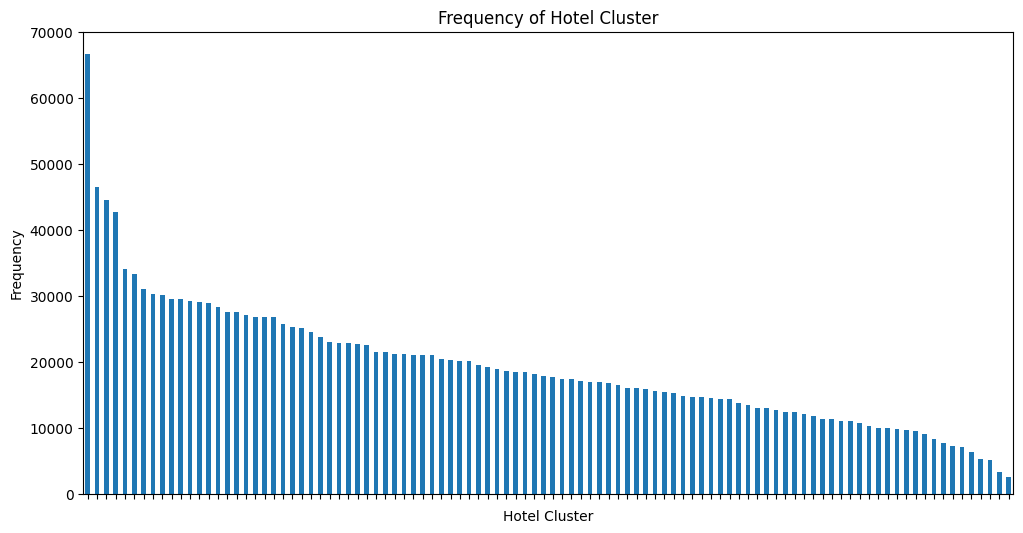

In [632]:
# Plotting all the hotel clusters

# Then, count the occurrences of each 
hotel_cluster_counts = (hotel_clean['hotel_cluster'].value_counts()).sort_values(ascending=False)

# Calculate the percentages
hotel_cluster_percentages = (hotel_cluster_counts / len(hotel_clean) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = hotel_cluster_counts.plot(kind='bar')
plt.xlabel('Hotel Cluster')
# Remove X-axis tick labels
plt.gca().set_xticklabels([])
plt.ylabel('Frequency')
plt.title('Frequency of Hotel Cluster')
plt.xticks(rotation=0)

# Show the plot
plt.show()

The `hotel_cluster` column serves as the target variable, which is crucial for predicting the hotel cluster associated with a user event. This prediction is based on various attributes linked to the user event and aims to identify one of the 100 potential hotel clusters. The third graph is showing the distribuition overview.

#### Some graphics <a class= 'anchor' id = '18'></a> 

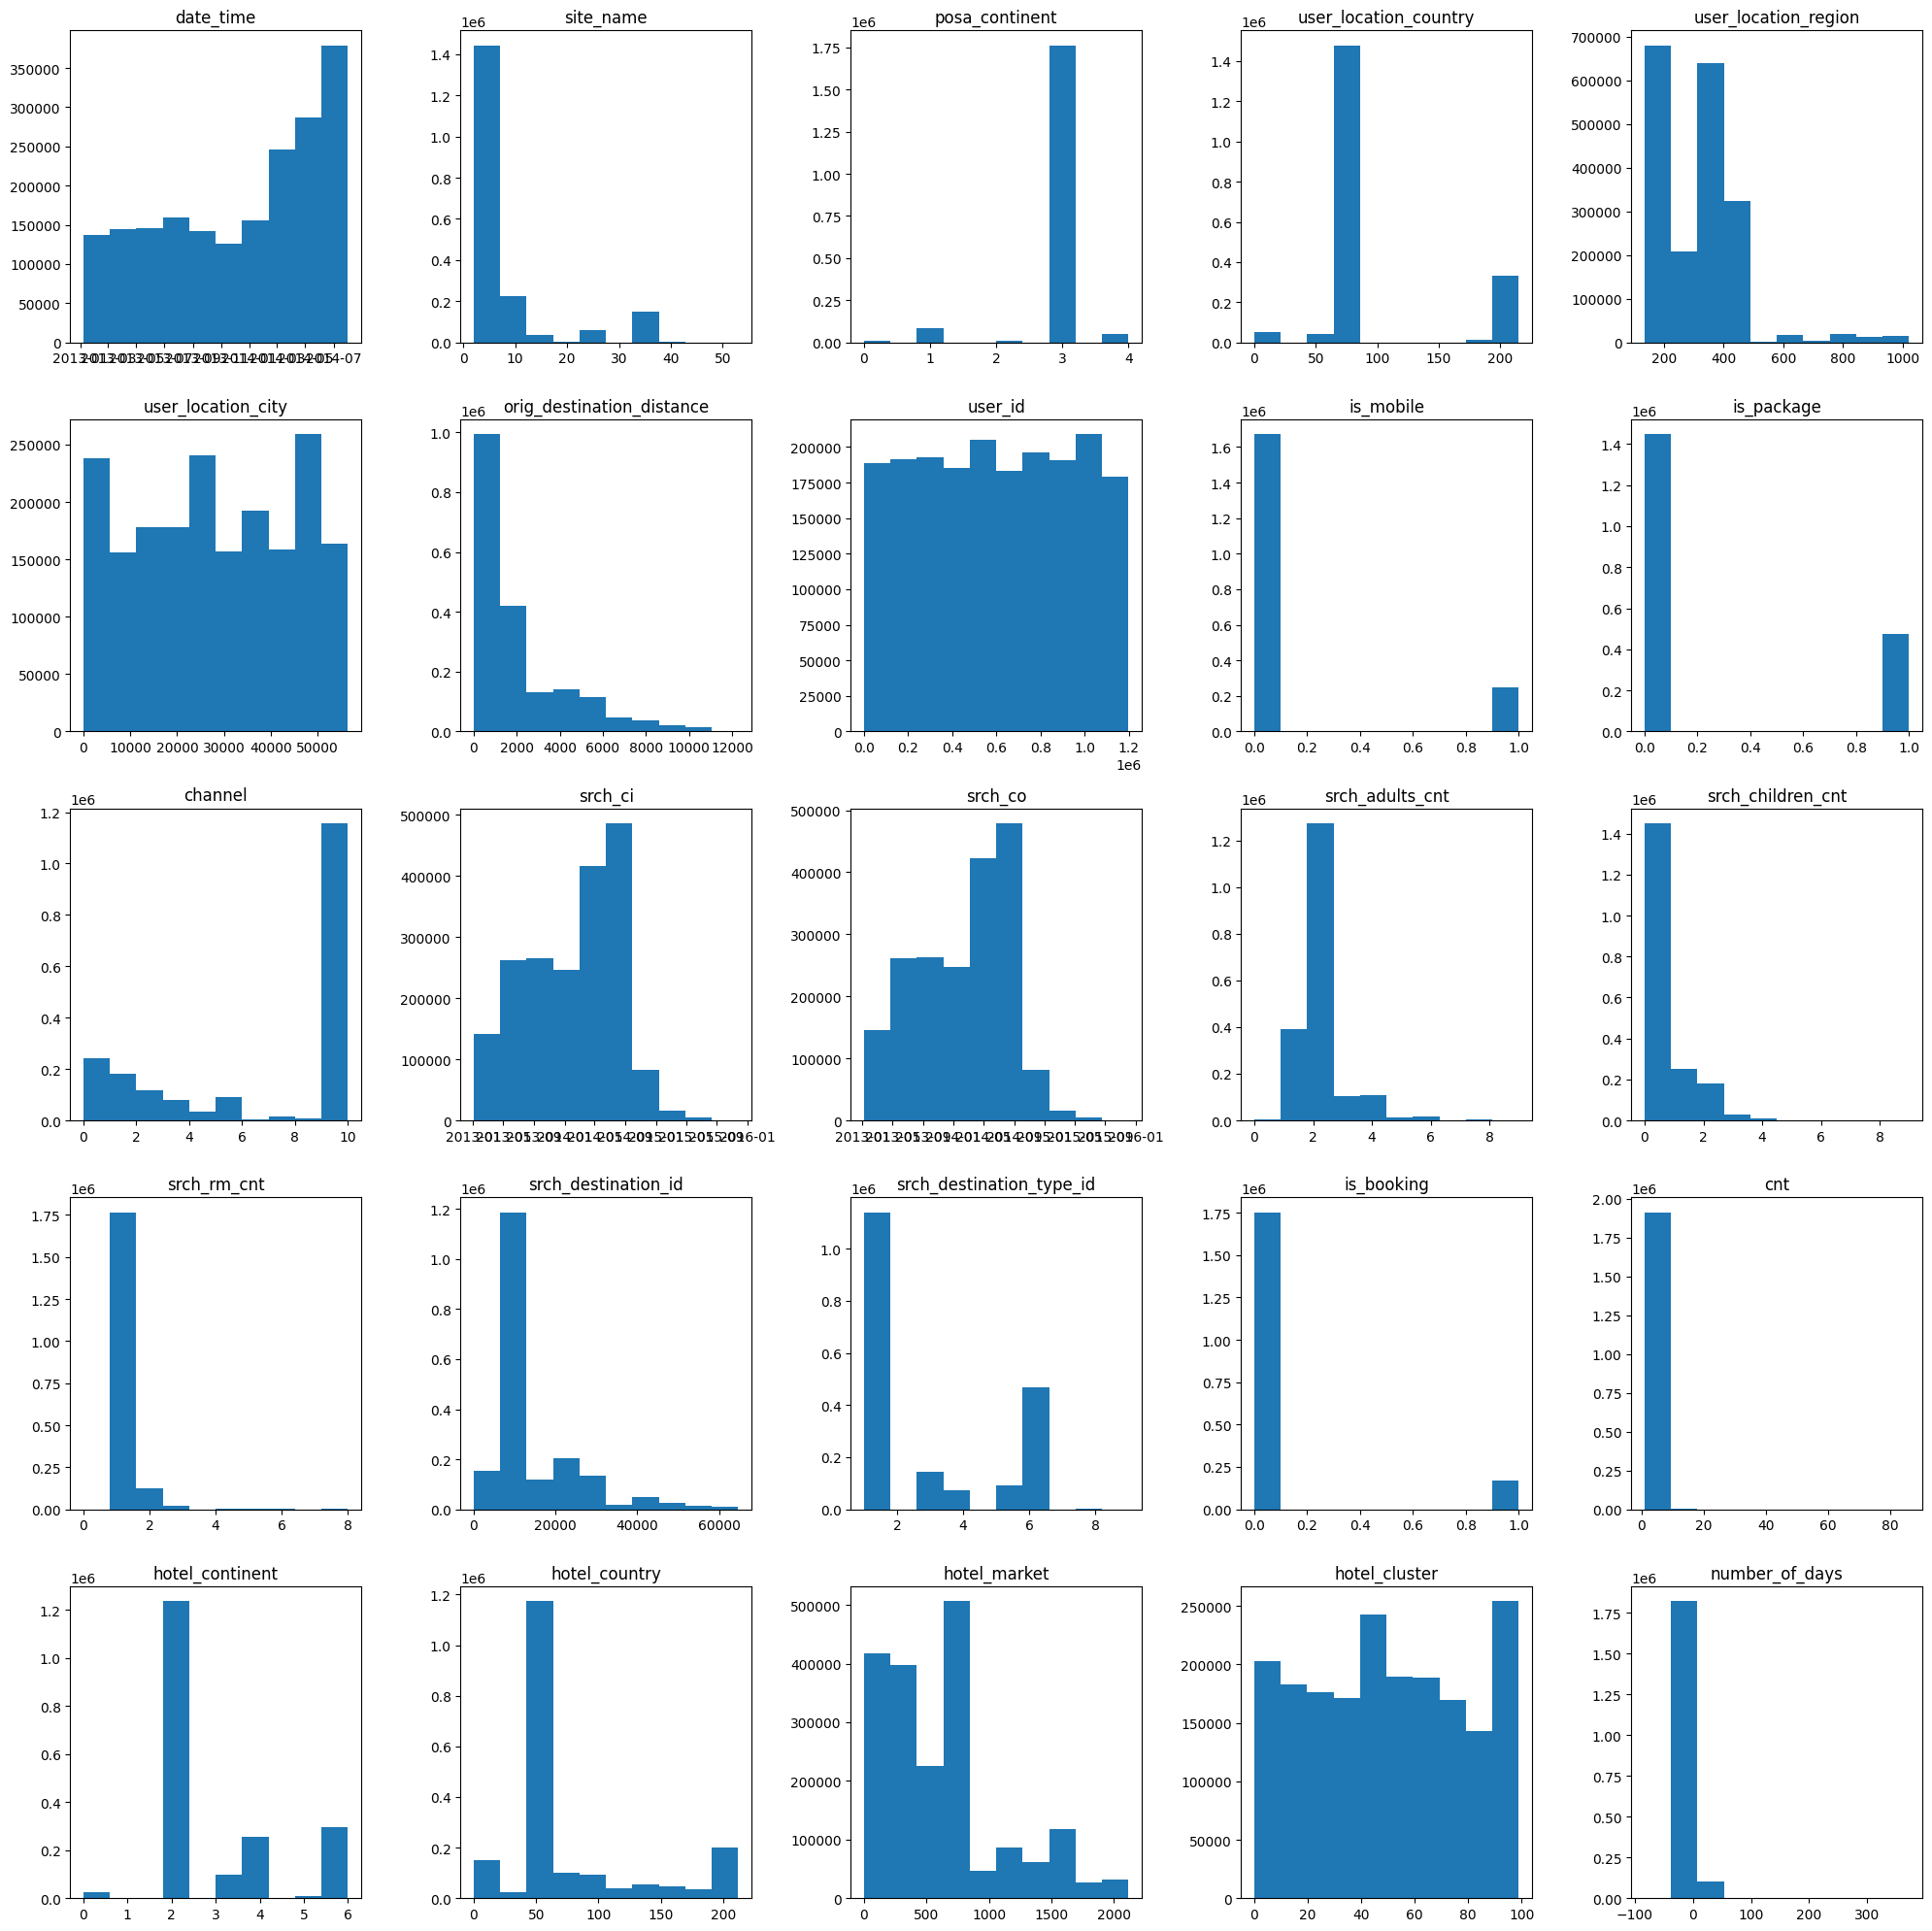

In [633]:
# Plotting graph for all the columns

plt.subplots(5, 5, figsize=(20, 20))

count = 1

for col in hotel_clean.columns:
    plt.subplot(5, 5, count)
    plt.hist(hotel_clean[col])
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

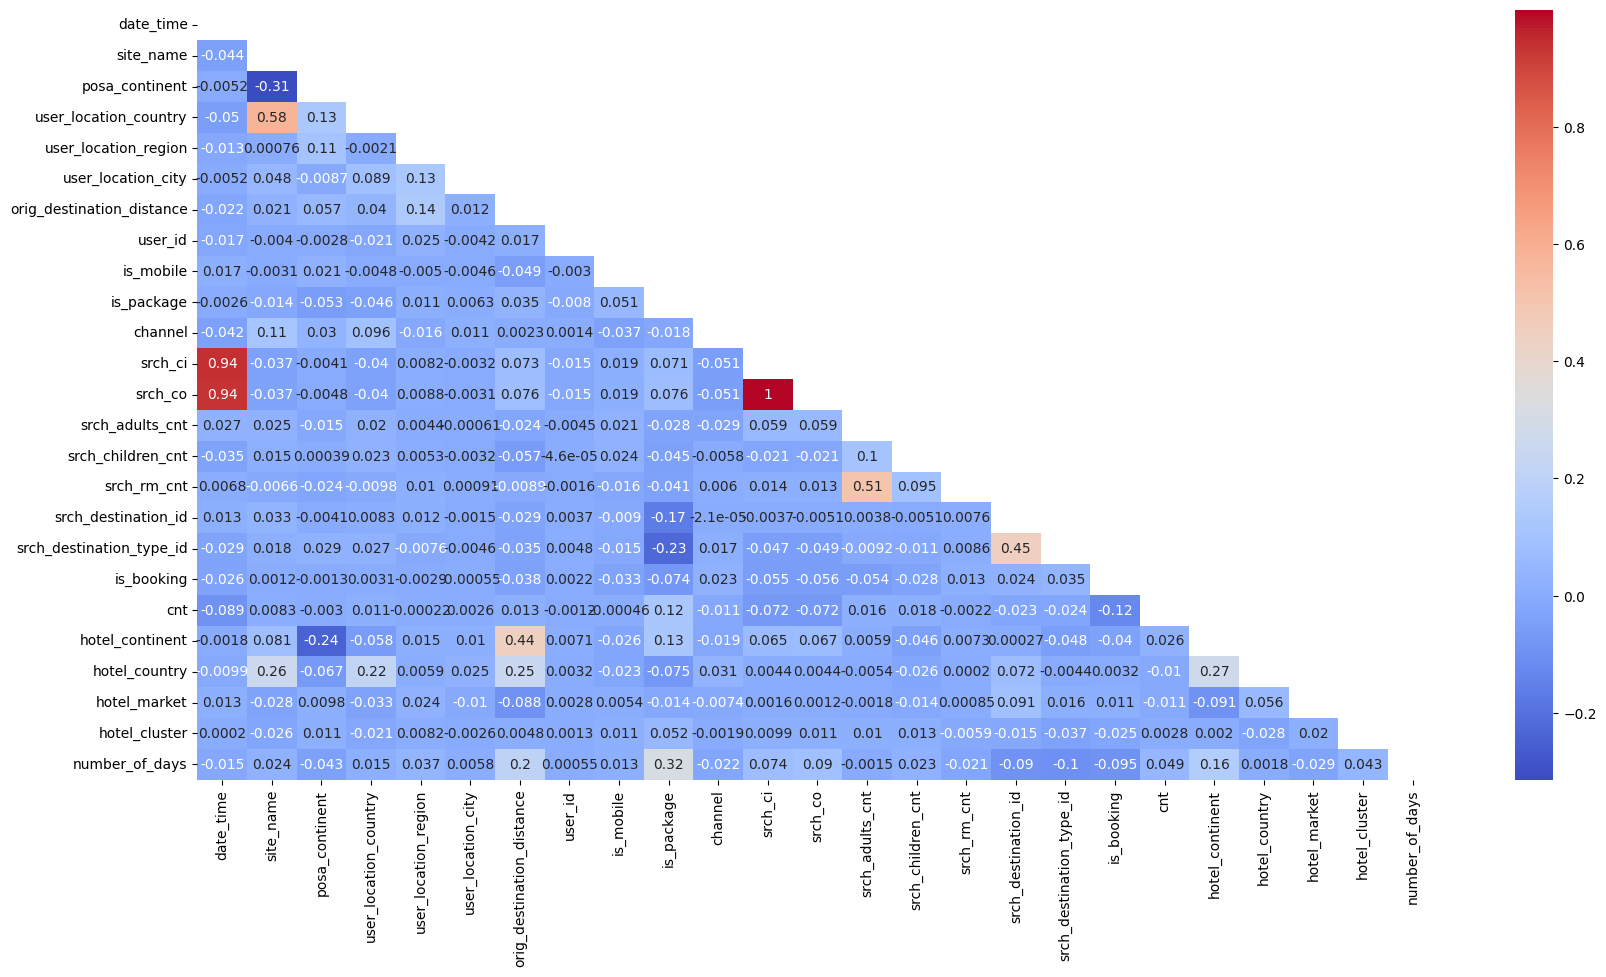

In [634]:
# find the correlation between the variables
corr = hotel_clean.corr()

# plot the correlation matrix using a heatmap
plt.figure(figsize=(20,10))
matrix = np.triu(hotel_clean.corr())
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm')
plt.show()

The heatmap presents a clear depiction of the dataset's correlations. Notably, there exists a strong positive correlation between the variables `srch_ci` and `srch_co` indicating that as one date shifts, the other follows suit. Furthermore, both `srch_ci` and `srch_co` exhibit a high correlation with `date_time`, which signifies the temporal aspect of the customers' interactions.

Another notable positive correlation emerges between `srch_rm_cnt` and `srch_adults_cnt`, suggesting that the number of adults in a party has a direct influence on the required room count, which is a logical relationship.

It's worth mentioning that the majority of the heatmap displays negative correlations. This phenomenon likely results from the categorical nature of the variables represented as numbers. These numerical values, which should ideally be treated as labels or categories, inadvertently introduce negative correlations when analyzed in a numerical context.

### Cleaning the test data: <a class= 'anchor' id = '19'></a> 

Checking the test dataset

In [635]:
# Checking the first 10
test_df.head(10)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-11-02 12:39:22,2,3,66,220,54870,636.48,1079676,1,0,9,2015-10-11,2015-10-15,6,0,1,5405,6,0,1,4,8,126,66
1,2014-08-20 19:13:46,2,3,117,373,16218,NaN,145975,0,0,9,2014-09-27,2014-09-30,3,3,2,11917,1,0,1,0,140,59,92
2,2014-10-13 12:40:44,23,1,1,457,6693,656.03,1067677,0,0,5,2014-12-31,2015-01-04,2,0,1,8253,1,0,1,6,70,19,51
4,2014-10-23 12:56:53,2,3,66,348,43040,NaN,971368,0,0,1,2014-10-27,2014-10-29,2,0,1,12014,1,0,2,2,50,644,68
6,2014-10-24 11:14:42,11,3,205,330,13971,257.71,95263,0,0,9,2014-10-27,2014-10-29,4,0,2,26272,6,1,1,2,198,975,7
7,2014-11-11 17:55:27,37,1,69,761,41949,NaN,168578,0,0,9,2014-11-18,2014-11-21,1,0,1,45327,6,0,1,2,50,675,56
9,2014-09-10 18:22:21,2,3,66,174,5938,76.33,287385,0,0,1,2014-10-04,2014-10-05,2,0,1,4273,3,0,1,2,50,366,18
12,2014-11-03 15:20:45,2,3,66,322,44140,1728.45,906548,1,1,0,2015-03-22,2015-03-27,2,2,1,8279,1,0,2,2,50,1230,70
16,2014-12-05 23:38:53,2,3,66,462,49272,614.02,1172654,0,0,2,2014-12-12,2014-12-14,2,0,1,24193,6,0,1,2,50,360,91
18,2014-12-14 08:12:06,2,3,66,174,19302,412.60,614460,0,0,9,2015-01-01,2015-01-04,2,0,1,8250,1,0,1,2,50,628,88


In [636]:
# Shape of the train data
print(f'There are {test_df.shape[0]} columns and {test_df.shape[1]} rows')

There are 1706830 columns and 24 rows


In [637]:
# Check the duplicated rows
test_df.duplicated().sum()

8

In [638]:
# Check the duplicated
duplicate_percentage = (test_df.duplicated().sum() / len(test_df)) * 100
duplicate_percentage

0.000468705143453068

As the percantage is very very small we can drop this columns

In [639]:
# Dropping the duplicated rows
test_df = test_df.drop_duplicates()

In [640]:
# Checking the NaN values
test_df.isna().sum()

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    637482
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                         519
srch_co                         518
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
dtype: int64

In [641]:
# Cheking this NaN values in the `orig_destination_distance` columns
test_df[test_df['orig_destination_distance'].isna()]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
1,2014-08-20 19:13:46,2,3,117,373,16218,NaN,145975,0,0,9,2014-09-27,2014-09-30,3,3,2,11917,1,0,1,0,140,59,92
4,2014-10-23 12:56:53,2,3,66,348,43040,NaN,971368,0,0,1,2014-10-27,2014-10-29,2,0,1,12014,1,0,2,2,50,644,68
7,2014-11-11 17:55:27,37,1,69,761,41949,NaN,168578,0,0,9,2014-11-18,2014-11-21,1,0,1,45327,6,0,1,2,50,675,56
24,2014-09-27 20:02:10,46,2,167,41,49050,NaN,1125140,0,1,6,2014-12-17,2014-12-21,6,0,3,6523,1,1,1,3,5,44,57
32,2014-08-16 08:59:08,24,2,3,50,5703,NaN,218203,0,0,2,2014-08-30,2014-08-31,2,0,1,6573,6,0,1,3,171,61,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670237,2014-12-09 08:53:35,2,3,66,337,51685,NaN,470931,0,0,2,2014-12-19,2014-12-20,2,0,1,8793,1,0,1,2,50,677,42
4670243,2014-12-29 13:33:17,11,3,205,155,34567,NaN,1097742,0,0,2,2015-03-15,2015-03-19,2,0,1,8250,1,0,1,2,50,628,79
4670244,2014-11-13 18:30:05,37,1,69,1010,15905,NaN,1064887,0,1,0,2014-11-26,2014-11-30,4,0,2,8245,1,0,1,6,22,245,46
4670265,2014-11-26 13:11:35,30,4,195,597,24759,NaN,1014946,0,0,0,2015-02-26,2015-03-01,2,0,1,8286,1,0,1,0,63,1258,87


In [642]:
# Check the percentage of NaN values
percentage_nan = (test_df['orig_destination_distance'].isna().sum() / len(test_df)) * 100
percentage_nan

37.349061589316285

Since 37% of the `orig_destination_distance` column contains NaN (missing) values, and it's not feasible to impute these missing values, I have decided to remove this column

In [643]:
# Drop the duplicated rows
test_df.dropna(subset=['orig_destination_distance'], inplace=True)

In [644]:
# Check the NaN values
test_df.isna().sum()

date_time                      0
site_name                      0
posa_continent                 0
user_location_country          0
user_location_region           0
user_location_city             0
orig_destination_distance      0
user_id                        0
is_mobile                      0
is_package                     0
channel                        0
srch_ci                      314
srch_co                      313
srch_adults_cnt                0
srch_children_cnt              0
srch_rm_cnt                    0
srch_destination_id            0
srch_destination_type_id       0
is_booking                     0
cnt                            0
hotel_continent                0
hotel_country                  0
hotel_market                   0
hotel_cluster                  0
dtype: int64

In [645]:
# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', None)

test_df[test_df['srch_ci'].isna()]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
17274,2014-10-07 18:42:18,2,3,66,348,17974,3767.45,1073931,0,0,0,NaN,NaN,2,0,1,20600,3,0,1,6,204,1772,85
34109,2014-08-04 08:02:24,2,3,66,348,24562,2560.17,694979,1,0,6,NaN,NaN,2,0,1,8279,1,0,1,2,50,1230,64
34514,2014-08-25 13:09:54,2,3,66,403,55849,2004.26,375995,0,0,0,NaN,NaN,2,0,1,24952,3,0,1,2,50,368,72
49059,2014-12-05 20:55:42,2,3,66,174,49258,568.97,38040,1,0,2,NaN,NaN,2,0,1,8276,1,0,1,2,50,661,91
49252,2014-09-09 20:50:06,2,3,66,258,47357,7176.01,944822,0,0,9,NaN,NaN,2,1,1,1447,3,0,2,5,202,171,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4572816,2014-10-02 00:04:16,2,3,66,346,31371,3083.97,964148,0,1,9,NaN,NaN,2,0,1,11439,1,0,1,4,163,1503,87
4630132,2014-08-22 08:26:13,2,3,66,314,6074,1348.44,892662,0,0,0,NaN,NaN,2,0,1,4452,3,0,1,4,8,110,5
4645396,2014-08-09 19:05:46,2,3,66,149,20498,1662.92,94297,0,0,0,NaN,NaN,2,0,1,24137,1,0,1,2,50,353,48
4648489,2014-08-07 19:31:26,2,3,66,174,8198,631.76,638112,1,0,9,NaN,NaN,2,0,1,16547,5,0,1,2,50,734,6


In [646]:
# Check the percentage
percentage_nan = (test_df['srch_ci'].isna().sum() / len(test_df)) * 100
percentage_nan

0.02936390670881104

In [647]:
# Drop the duplicates
test_df.dropna(subset=['srch_ci'], inplace=True)

In [648]:
# Check the NaN values
test_df.isna().sum()

date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
dtype: int64

As the NaN values in the `srch_ci` column make up less than 1% of the data, I have dropped them. Upon verification, there are now no NaN values in the dataset.

Save the data as a CSV file

In [651]:
# Save the data to a CSV file
hotel_clean.to_csv('hotel_clean.csv', index=False)

In [520]:
# Save the data in a CSV
test_df.to_csv('test_df.csv', index=False)

In [653]:
hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920731 entries, 3 to 4670290
Data columns (total 25 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    datetime64[ns]
 12  srch_co                    datetime64[ns]
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64         